In [508]:
import pandas as pd

# Load the CSV file with the updated path
file_path = "/Users/niyasy/Downloads/Msc Project/Protein library/a 2 macroglobulin/Processed Detector 1 Hanning Applied alpha 2 macroglobulin 1 12_02_24 10 sec avg 3 cyc 2DIR Tw=0.3ps, Run 0 Cycle1.csv"
data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows to understand its structure
data.head()

0       0.1  5.5152793518213  11.0305587036426  16.5458380554639  \
0  1474.216 -0.021493        -0.031450         -0.024417         -0.004459   
1  1475.856 -0.012092        -0.016045         -0.017999         -0.011608   
2  1477.503 -0.020330        -0.013792         -0.011986         -0.014841   
3  1479.155  0.002445         0.000481         -0.009702         -0.017657   
4  1480.814 -0.018950        -0.018524         -0.011428          0.004414   

   22.0611174072852  27.5763967591065  33.0916761109278  38.6069554627491  \
0         -0.007994         -0.002834          0.003511         -0.009121   
1         -0.007279         -0.006121         -0.009845         -0.024014   
2         -0.005750         -0.000377         -0.012617         -0.025314   
3         -0.011690         -0.003589          0.000716          0.000326   
4          0.008373         -0.000060         -0.005362         -0.006093   

   44.1222348145704  ...  2724.54799979972  2730.06327915154  \
0         -0.006409  ...         -0.047032         -0.006903   
1         -0.039763  ...         -0.068403         -0.048255   
2         -0.028023  ...         -0.044829         -0.036509   
3         -0.008710  ...         -0.030597         -0.022936   
4          0.000837  ...         -0.005403          0.000611   

   2735.57855850336  2741.09383785518  2746.60911720701  2752.12439655883  \
0         -0.006409         -0.009121          0.003511         -0.002834   
1         -0.039763         -0.024014         -0.009845         -0.006121   
2         -0.028023         -0.025314         -0.012617         -0.000377   
3         -0.008710          0.000326          0.000716         -0.003589   
4          0.000837         -0.006093         -0.005362         -0.000060   

   2757.63967591065  2763.15495526247  2768.67023461429  2774.18551396611  
0         -0.007994         -0.004459         -0.024417         -0.031450  
1         -0.007279         -0.011608         -0.017999         -0.016045  
2         -0.005750         -0.014841         -0.011986         -0.013792  
3         -0.011690         -0.017657         -0.009702          0.000481  
4          0.008373          0.004414         -0.011428         -0.018524  

[5 rows x 505 columns]

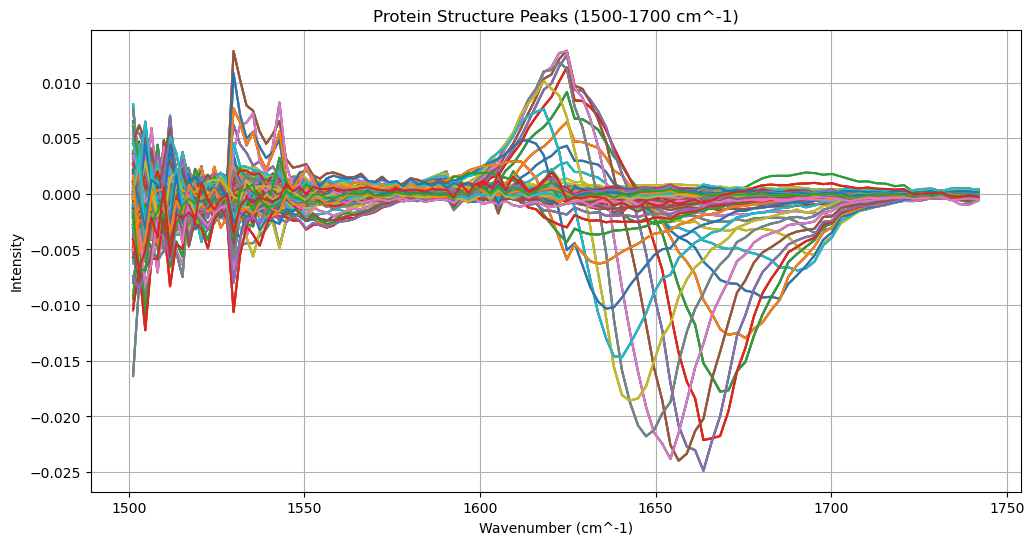

In [510]:
import matplotlib.pyplot as plt

# Convert the first column to numeric and filter the data for the range 1500-1700 cm^-1
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')
filtered_data = data[(data.iloc[:, 0] >= 1500) & (data.iloc[:, 0] <= 1800)]

# Plot the filtered data
plt.figure(figsize=(12, 6))
for col in filtered_data.columns[1:]:
    plt.plot(filtered_data.iloc[:, 0], filtered_data[col], label=col)

plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Intensity')
plt.title('Protein Structure Peaks (1500-1700 cm^-1)')
#plt.legend(False)#loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()


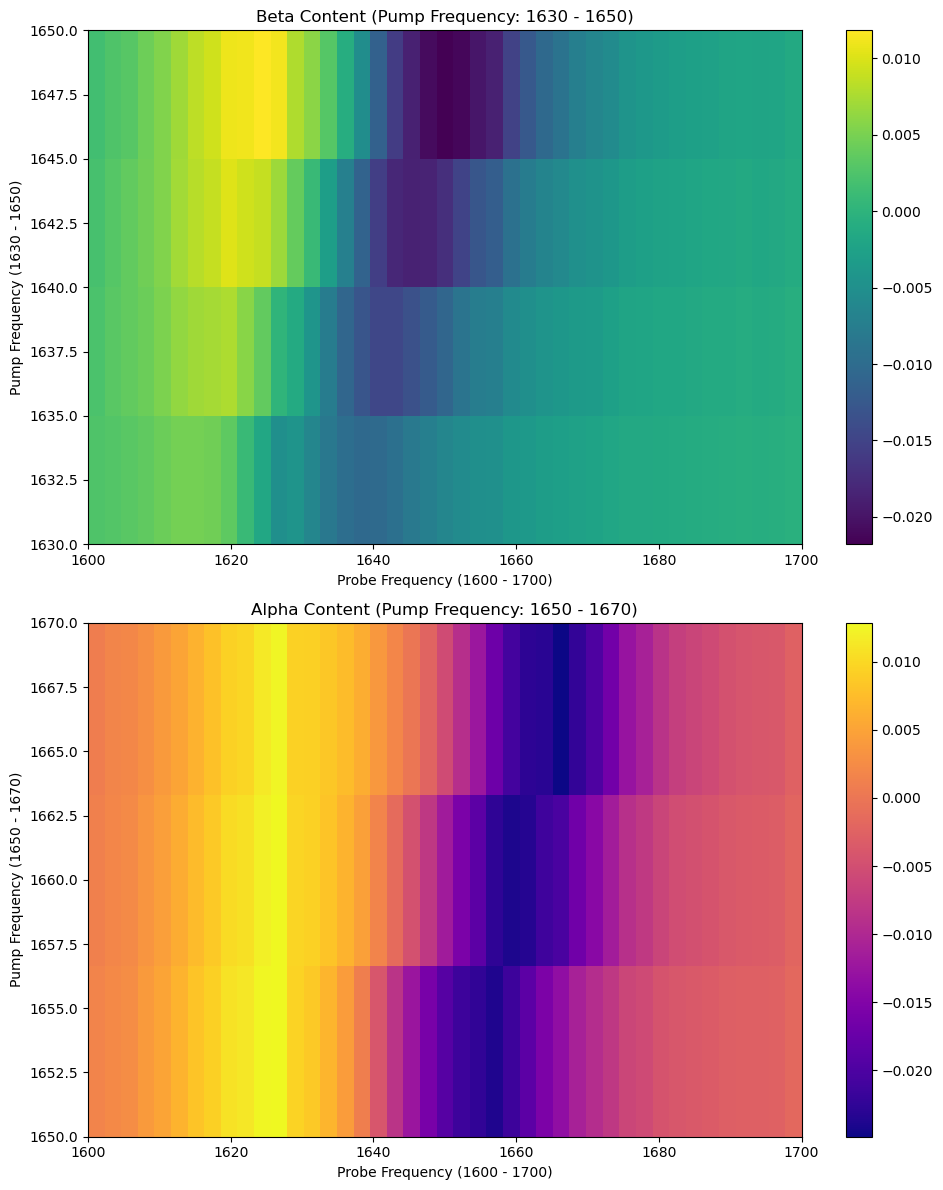

In [512]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the columns and rows to numeric values for easy slicing
data.columns = pd.to_numeric(data.columns, errors='ignore')
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='ignore')

# Filter the data for the required probe frequency range (1600 - 1700)
probe_filtered = data[(data.iloc[:, 0] >= 1600) & (data.iloc[:, 0] <= 1700)]

# Set the probe frequency as the index for easier plotting
probe_filtered.set_index(probe_filtered.columns[0], inplace=True)

# Extract the columns (pump frequencies) for the beta and alpha content ranges
beta_content = probe_filtered.loc[:, (probe_filtered.columns >= 1630) & (probe_filtered.columns <= 1650)]
alpha_content = probe_filtered.loc[:, (probe_filtered.columns >= 1650) & (probe_filtered.columns <= 1670)]

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Beta content plot
im_beta = axes[0].imshow(beta_content.T, aspect='auto', origin='lower',
                         extent=[1600, 1700, 1630, 1650], cmap='viridis')
axes[0].set_title('Beta Content (Pump Frequency: 1630 - 1650)')
axes[0].set_xlabel('Probe Frequency (1600 - 1700)')
axes[0].set_ylabel('Pump Frequency (1630 - 1650)')
fig.colorbar(im_beta, ax=axes[0], orientation='vertical')

# Alpha content plot
im_alpha = axes[1].imshow(alpha_content.T, aspect='auto', origin='lower',
                          extent=[1600, 1700, 1650, 1670], cmap='plasma')
axes[1].set_title('Alpha Content (Pump Frequency: 1650 - 1670)')
axes[1].set_xlabel('Probe Frequency (1600 - 1700)')
axes[1].set_ylabel('Pump Frequency (1650 - 1670)')
fig.colorbar(im_alpha, ax=axes[1], orientation='vertical')

plt.tight_layout()
plt.show()


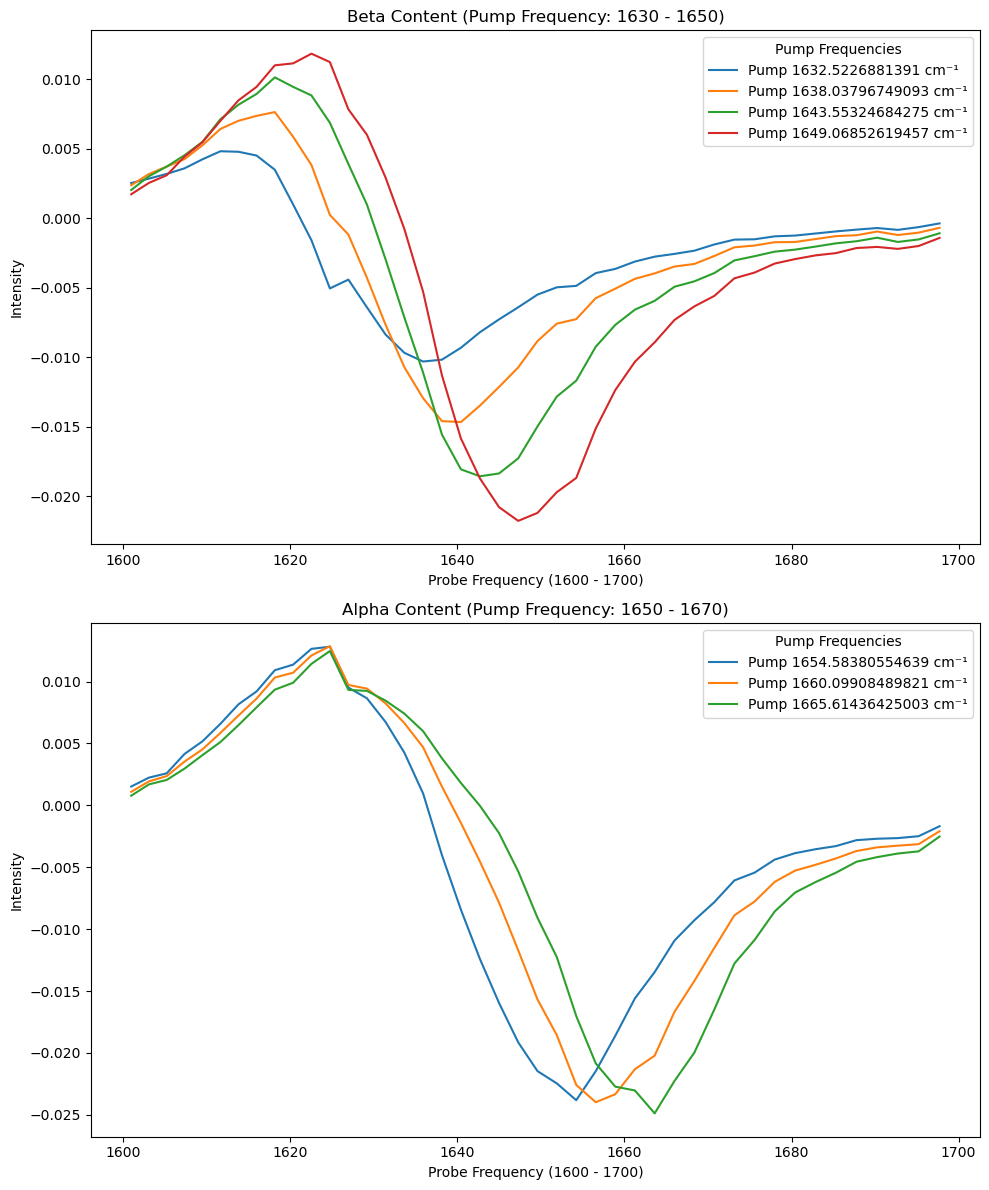

In [514]:
# Plotting the data as line spectra
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot Beta content
for pump_freq in beta_content.columns:
    axes[0].plot(beta_content.index, beta_content[pump_freq], label=f'Pump {pump_freq} cm⁻¹')

axes[0].set_title('Beta Content (Pump Frequency: 1630 - 1650)')
axes[0].set_xlabel('Probe Frequency (1600 - 1700)')
axes[0].set_ylabel('Intensity')
axes[0].legend(title='Pump Frequencies')

# Plot Alpha content
for pump_freq in alpha_content.columns:
    axes[1].plot(alpha_content.index, alpha_content[pump_freq], label=f'Pump {pump_freq} cm⁻¹')

axes[1].set_title('Alpha Content (Pump Frequency: 1650 - 1670)')
axes[1].set_xlabel('Probe Frequency (1600 - 1700)')
axes[1].set_ylabel('Intensity')
axes[1].legend(title='Pump Frequencies')

plt.tight_layout()
plt.show()


In [338]:
import os
import pandas as pd
import re

# Directory containing the protein libraries
protein_dir = '/Users/niyasy/Downloads/Msc Project/Protein library'

# Function to extract Tw value from the file name
def extract_tw(filename):
    match = re.search(r'Tw=(\d+\.\d+)ps', filename)
    if match:
        return float(match.group(1))
    else:
        return float('inf')  # Return a large number if Tw is not found

# Dictionary to store the shortest Tw file for each protein
shortest_tw_files = {}

# Iterate over each protein folder
for protein in os.listdir(protein_dir):
    protein_path = os.path.join(protein_dir, protein)
    if os.path.isdir(protein_path):
        shortest_tw = float('inf')
        shortest_tw_file = None
        # Iterate over each file in the protein folder
        for file in os.listdir(protein_path):
            if file.endswith('.csv'):
                tw_value = extract_tw(file)
                if tw_value == 0.25 and 'Cycle1' in file:
                    if tw_value < shortest_tw:
                        shortest_tw = tw_value
                        shortest_tw_file = os.path.join(protein_path, file)
        if shortest_tw_file:
            shortest_tw_files[protein] = shortest_tw_file

# Print the selected files for each protein
for protein, filepath in shortest_tw_files.items():
    print(f"Selected file for {protein}: {filepath}")


Selected file for Pepsin: /Users/niyasy/Downloads/Msc Project/Protein library/Pepsin/Processed Detector 2 Hanning Applied Pepsin 3 13_02_24 10 sec avg 3 cyc 2DIR Tw=0.25ps, Run 0 Cycle1.csv
Selected file for Myoglobin: /Users/niyasy/Downloads/Msc Project/Protein library/Myoglobin/Processed Detector 2 Hanning Applied Myoglobin 1 02_02_24 10 sec avg 3 cyc 2DIR Tw=0.25ps, Run 0 Cycle1.csv
Selected file for TCI: /Users/niyasy/Downloads/Msc Project/Protein library/TCI/Processed Detector 1 Hanning Applied TCI 3 01_02_24 10 sec avg 3 cyc 2DIR Tw=0.25ps, Run 0 Cycle1.csv
Selected file for Trypsin inhibitor A: /Users/niyasy/Downloads/Msc Project/Protein library/Trypsin inhibitor A/Processed Detector 1 Hanning Applied Tryp 1 30_01_24 Tw=0.25ps, Run 0 Cycle1.csv
Selected file for Prealbumin: /Users/niyasy/Downloads/Msc Project/Protein library/Prealbumin/Processed Detector 1 Hanning Applied prealbumin 1 09_02_24 10 sec avg 3 cyc 2DIR Tw=0.25ps, Run 0 Cycle1.csv
Selected file for Lysozyme: /Users/n

In [340]:
shortest_tw_files_df = pd.DataFrame(list(shortest_tw_files.items()), columns=['Protein', 'File Path'])
shortest_tw_files_df

Protein                                          File Path
0                 Pepsin  /Users/niyasy/Downloads/Msc Project/Protein li...
1              Myoglobin  /Users/niyasy/Downloads/Msc Project/Protein li...
2                    TCI  /Users/niyasy/Downloads/Msc Project/Protein li...
3    Trypsin inhibitor A  /Users/niyasy/Downloads/Msc Project/Protein li...
4             Prealbumin  /Users/niyasy/Downloads/Msc Project/Protein li...
5               Lysozyme  /Users/niyasy/Downloads/Msc Project/Protein li...
6        apo transferrin  /Users/niyasy/Downloads/Msc Project/Protein li...
7     Lactoferrin bovine  /Users/niyasy/Downloads/Msc Project/Protein li...
8             gly phos b  /Users/niyasy/Downloads/Msc Project/Protein li...
9           Cytochrome c  /Users/niyasy/Downloads/Msc Project/Protein li...
10  Superoxide dismutase  /Users/niyasy/Downloads/Msc Project/Protein li...
11                 Con A  /Users/niyasy/Downloads/Msc Project/Protein li...
12              Elastase  /Users/niyasy/Downloads/Msc Project/Protein li...
13             a amylase  /Users/niyasy/Downloads/Msc Project/Protein li...
14       b glucuronidase  /Users/niyasy/Downloads/Msc Project/Protein li...
15            Conalbumin  /Users/niyasy/Downloads/Msc Project/Protein li...
16                   IgG  /Users/niyasy/Downloads/Msc Project/Protein li...
17       Choline oxidase  /Users/niyasy/Downloads/Msc Project/Protein li...
18            Peroxidase  /Users/niyasy/Downloads/Msc Project/Protein li...
19              Catalase  /Users/niyasy/Downloads/Msc Project/Protein li...
20     Lactoferrin human  /Users/niyasy/Downloads/Msc Project/Protein li...
21             Ubiquitin  /Users/niyasy/Downloads/Msc Project/Protein li...
22       b lactoglobulin  /Users/niyasy/Downloads/Msc Project/Protein li...
23            Lipoxidase  /Users/niyasy/Downloads/Msc Project/Protein li...
24            Calmodulin  /Users/niyasy/Downloads/Msc Project/Protein li...
25               RNase A  /Users/niyasy/Downloads/Msc Project/Protein li...
26                Leptin  /Users/niyasy/Downloads/Msc Project/Protein li...
27     a 2 macroglobulin  /Users/niyasy/Downloads/Msc Project/Protein li...
28      Gly 3 phos dehyd  /Users/niyasy/Downloads/Msc Project/Protein li...
29             Thaumatin  /Users/niyasy/Downloads/Msc Project/Protein li...
30                   HSA  /Users/niyasy/Downloads/Msc Project/Protein li...
31              Creatine  /Users/niyasy/Downloads/Msc Project/Protein li...
32              Protease  /Users/niyasy/Downloads/Msc Project/Protein li...

In [389]:
import numpy as np
import matplotlib.pyplot as plt

# Function to extract feature variables
def extract_features(file_path):
    data = pd.read_csv(file_path, delimiter='\t')

    # Converting columns and rows to numeric values
    data.columns = pd.to_numeric(data.columns, errors='ignore')
    data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='ignore')

    # Filtering out data for required probe frequency range
    probe_filtered = data[(data.iloc[:, 0] >= 1600) & (data.iloc[:, 0] <= 1700)]

    # Setting the probe frequency as index
    probe_filtered.set_index(probe_filtered.columns[0], inplace=True)

    # Extracting beta and alpha content
    beta_content = probe_filtered.loc[:, (probe_filtered.columns >= 1630) & (probe_filtered.columns <= 1650)]
    alpha_content = probe_filtered.loc[:, (probe_filtered.columns >= 1650) & (probe_filtered.columns <= 1670)]

    # Extracting feature variables
    features = {}
    features['Beta_Max_Intensity'] = beta_content.max().max()
    features['Beta_Max_Intensity_Freq'] = beta_content.idxmax().max()
    features['Beta_Min_Intensity'] = beta_content.min().min()
    features['Beta_Min_Intensity_Freq'] = beta_content.idxmin().min()
    features['Alpha_Max_Intensity'] = alpha_content.max().max()
    features['Alpha_Max_Intensity_Freq'] = alpha_content.idxmax().max()
    features['Alpha_Min_Intensity'] = alpha_content.min().min()
    features['Alpha_Min_Intensity_Freq'] = alpha_content.idxmin().min()

    return features

# Extracting feature variables for all selected files
feature_vars = []
for file_path in shortest_tw_files.values():
    features = extract_features(file_path)
    feature_vars.append(features)

# Converting list of feature variables to DataFrame
feature_df = pd.DataFrame(feature_vars)

# Adding protein name column
feature_df['Protein'] = shortest_tw_files.keys()


# Resetting index
feature_df.reset_index(drop=True, inplace=True)


# Move Protein column to the first position
feature_df.insert(0, 'Protein', feature_df.pop('Protein'))

# Displaying first few rows of the DataFrame
feature_df

Protein  Beta_Max_Intensity  Beta_Max_Intensity_Freq  \
0                 Pepsin            0.015460                 1620.783   
1              Myoglobin            0.022007                 1632.683   
2                    TCI            0.005445                 1617.071   
3    Trypsin inhibitor A            0.020376                 1623.309   
4             Prealbumin            0.021903                 1619.047   
5               Lysozyme            0.008537                 1625.690   
6        apo transferrin            0.010583                 1625.739   
7     Lactoferrin bovine            0.024294                 1625.928   
8             gly phos b            0.005165                 1619.912   
9           Cytochrome c            0.005265                 1623.401   
10  Superoxide dismutase            0.013977                 1614.663   
11                 Con A            0.037871                 1620.794   
12              Elastase            0.010497                 1623.502   
13             a amylase            0.024760                 1623.879   
14       b glucuronidase            0.004027                 1614.614   
15            Conalbumin            0.007982                 1621.614   
16                   IgG            0.021388                 1621.481   
17       Choline oxidase            0.003031                 1621.486   
18            Peroxidase            0.006993                 1623.764   
19              Catalase            0.011178                 1621.481   
20     Lactoferrin human            0.003395                 1622.975   
21             Ubiquitin            0.010528                 1623.074   
22       b lactoglobulin            0.017904                 1618.355   
23            Lipoxidase            0.007312                 1620.783   
24            Calmodulin            0.012648                 1632.683   
25               RNase A            0.056144                 1620.122   
26                Leptin            0.008213                 1627.548   
27     a 2 macroglobulin            0.012493                 1622.516   
28      Gly 3 phos dehyd            0.020649                 1618.985   
29             Thaumatin            0.019031                 1620.521   
30                   HSA            0.020269                 1634.041   
31              Creatine            0.014652                 1621.430   
32              Protease            0.012750                 1623.363   

    Beta_Min_Intensity  Beta_Min_Intensity_Freq  Alpha_Max_Intensity  \
0            -0.036708                 1629.816             0.014674   
1            -0.068350                 1651.288             0.053434   
2            -0.028148                 1637.316             0.005337   
3            -0.057513                 1636.204             0.019555   
4            -0.061649                 1634.749             0.015072   
5            -0.024479                 1651.296             0.019085   
6            -0.022548                 1637.017             0.011471   
7            -0.051961                 1637.004             0.025872   
8            -0.022241                 1637.899             0.009709   
9            -0.022284                 1634.909             0.013433   
10           -0.043041                 1635.136             0.015434   
11           -0.107983                 1634.568             0.029520   
12           -0.026935                 1637.017             0.009355   
13           -0.052577                 1635.299             0.025246   
14           -0.023655                 1635.407             0.003580   
15           -0.017678                 1635.299             0.008552   
16           -0.100097                 1635.252             0.019522   
17           -0.019836                 1635.407             0.002537   
18           -0.028086                 1637.316             0.011830   
19           -0.037003                 1635.252             0.011547   
20           -0.017925

In [391]:
import pandas as pd

# Loading the spreadsheet with total alpha and beta content levels
content_file = '/Users/niyasy/Downloads/Msc Project/Protein secondary structure content.xlsx'
content_df = pd.read_excel(content_file)
content_df.rename(columns={'Protein (PDB ID)': 'Protein'}, inplace=True)

# Filter out the specified proteins
proteins_to_remove = ['Chymotrypsinogen A (2cga)', 'DT-diaphorase (1d4a)', 'Ovalbumin (1ova)']
validation_df = content_df[content_df['Protein'].isin(proteins_to_remove)]
training_df = content_df[~content_df['Protein'].isin(proteins_to_remove)]

# Remove the 'Total β- antiparallel' and 'Total β- parallel' columns
columns_to_remove = ['Total β- antiparallel', 'Total β- parallel']
training_df = training_df.drop(columns=columns_to_remove, errors='ignore')

# Reset the index, starting from 1
training_df.reset_index(drop=True, inplace=True)
training_df.index += 1

# Display the updated training_df
print(training_df)

                                             Protein  Total α  Total β
1                      Alpha-2- Macroglobulin (4acq)    12.45    29.97
2                               Alpha-Amylase (1vjs)    23.37    19.86
3                             Apo-Transferrin (4h0w)    29.60    18.11
4                          Beta-Glucunoridase (3lpf)    17.58    29.68
5                          Beta-Lactoglobulin (3npo)     9.88    40.74
6                                         TCI (5j4q)     0.00    27.02
7                                  Calmodulin (1prw)    51.14     2.38
8                                    Catalase (3rgp)    27.25    16.63
9                             Choline oxidase (4mjw)    20.86    20.68
10                    Concanavalin A (Lectin) (1i3h)     0.00    43.36
11                   Creatine (phospho)kinase (1u6r)    35.26    14.21
12                               Cytochrome c (1hrc)    41.35     0.00
13                                   Elastase (1qnj)     5.83    34.17
14  Gl

In [393]:
protein_name_mapping = {
    'Pepsin': 'Pepsin A (4pep)',
    'Myoglobin': 'Myoglobin (1wla)',
    'TCI': 'TCI (5j4q)',
    'Trypsin inhibitor A': 'Trypsin inhibitor A (1ba7)',
    'Prealbumin': 'Prealbumin (1tta)',
    'Lysozyme': 'Lysozyme (4lzt)',
    'apo transferrin': 'Apo-Transferrin (4h0w)',
    'Lactoferrin bovine': 'Lactoferrin bovin (1blf)',
    'gly phos b': 'Glycogen phosphorylase-b (1axr)',
    'Cytochrome c': 'Cytochrome c (1hrc)',
    'Superoxide dismutase': 'Superoxidase Dismutase (Cu Zn) (1q0e)',
    'Con A': 'Concanavalin A (Lectin) (1i3h)',
    'Elastase': 'Elastase (1qnj)',
    'a amylase': 'Alpha-Amylase (1vjs)',
    'b glucuronidase': 'Beta-Glucunoridase (3lpf)',
    'Conalbumin': 'Ovotransferrin (Conalbumin) (1ovt)',
    'IgG': 'IgG (1hzh)',
    'Choline oxidase': 'Choline oxidase (4mjw)',
    'Peroxidase': 'Peroxidase (1hch)',
    'Catalase': 'Catalase (3rgp)',
    'Lactoferrin human': 'Lactoferrin human (1cb6)',
    'Ubiquitin': 'Ubiquitin (2wwz)',
    'b lactoglobulin': 'Beta-Lactoglobulin (3npo)',
    'Lipoxidase': 'Lipoxidase (1f8n)',
    'Calmodulin': 'Calmodulin (1prw)',
    'RNase A': 'RNase A (1kf5)',
    'Leptin': 'Leptin (1ax8)',
    'a 2 macroglobulin': 'Alpha-2- Macroglobulin (4acq)',
    'Gly 3 phos dehyd': 'Glyceraldehyde-3- phosphate dehydrogenase (1j0x)',
    'Thaumatin': 'Thaumatin (3aok)',
    'HSA': 'HSA (1n5u)',
    'Creatine': 'Creatine (phospho)kinase (1u6r)',
    'Protease': 'Protease (3unx)'
}

# Mapping the protein names in feature_df
feature_df['Protein'] = feature_df['Protein'].map(protein_name_mapping)

# Filtering out rows where mapping failed (if any)
feature_df = feature_df.dropna(subset=['Protein'])

# Merge the extracted features with the filtered content data
merged_df = pd.merge(feature_df, training_df, on='Protein')
merged_df.reset_index (drop=True, inplace=True)
merged_df.index += 1
merged_df

Protein  Beta_Max_Intensity  \
1                                    Pepsin A (4pep)            0.015460   
2                                   Myoglobin (1wla)            0.022007   
3                                         TCI (5j4q)            0.005445   
4                         Trypsin inhibitor A (1ba7)            0.020376   
5                                  Prealbumin (1tta)            0.021903   
6                                    Lysozyme (4lzt)            0.008537   
7                             Apo-Transferrin (4h0w)            0.010583   
8                           Lactoferrin bovin (1blf)            0.024294   
9                    Glycogen phosphorylase-b (1axr)            0.005165   
10                               Cytochrome c (1hrc)            0.005265   
11             Superoxidase Dismutase (Cu Zn) (1q0e)            0.013977   
12                    Concanavalin A (Lectin) (1i3h)            0.037871   
13                                   Elastase (1qnj)            0.010497   
14                              Alpha-Amylase (1vjs)            0.024760   
15                         Beta-Glucunoridase (3lpf)            0.004027   
16                Ovotransferrin (Conalbumin) (1ovt)            0.007982   
17                                        IgG (1hzh)            0.021388   
18                            Choline oxidase (4mjw)            0.003031   
19                                 Peroxidase (1hch)            0.006993   
20                                   Catalase (3rgp)            0.011178   
21                          Lactoferrin human (1cb6)            0.003395   
22                                  Ubiquitin (2wwz)            0.010528   
23                         Beta-Lactoglobulin (3npo)            0.017904   
24                                 Lipoxidase (1f8n)            0.007312   
25                                 Calmodulin (1prw)            0.012648   
26                                    RNase A (1kf5)            0.056144   
27                                     Leptin (1ax8)            0.008213   
28                     Alpha-2- Macroglobulin (4acq)            0.012493   
29  Glyceraldehyde-3- phosphate dehydrogenase (1j0x)            0.020649   
30                                  Thaumatin (3aok)            0.019031   
31                                        HSA (1n5u)            0.020269   
32                   Creatine (phospho)kinase (1u6r)            0.014652   
33                                   Protease (3unx)            0.012750   

    Beta_Max_Intensity_Freq  Beta_Min_Intensity  Beta_Min_Intensity_Freq  \
1                  1620.783           -0.036708                 1629.816   
2                  1632.683           -0.068350                 1651.288   
3                  1617.071           -0.028148                 1637.316   
4                  1623.309           -0.057513                 1636.204   
5                  1619.047           -0.061649                 1634.749   
6                  1625.690           -0.024479                 1651.296   
7                  1625.739           -0.022548                 1637.017   
8                  1625.928           -0.051961                 1637.004   
9                  1619.912           -0.022241                 1637.899   
10                 1623.401           -0.022284                 1634.909   
11                 1614.663           -0.043041                 1635.136   
12                 1620.794           -0.107983                 1634.568   
13                 1623.502           -0.026935                 1637.017   
14                 1623.879           -0.052577                 1635.299   
15                 1614.614           -0.023655                 1635.407   
16                 1621.614           -0.017678                 1635.299   
17                 1621.481           -0.100097                 1635.252   
18                 1621.486           -0.019836                 1635.407   
19              

In [345]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# merged_df is our DataFrame
features = ['Beta_Max_Intensity', 'Beta_Max_Intensity_Freq', 'Beta_Min_Intensity', 
            'Beta_Min_Intensity_Freq', 'Alpha_Max_Intensity', 'Alpha_Max_Intensity_Freq', 
            'Alpha_Min_Intensity', 'Alpha_Min_Intensity_Freq']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
merged_df[features] = scaler.fit_transform(merged_df[features])

merged_df

Protein  Beta_Max_Intensity  \
1                                    Pepsin A (4pep)            0.038568   
2                                   Myoglobin (1wla)            0.658358   
3                                         TCI (5j4q)           -0.909507   
4                         Trypsin inhibitor A (1ba7)            0.503957   
5                                  Prealbumin (1tta)            0.648558   
6                                    Lysozyme (4lzt)           -0.616762   
7                             Apo-Transferrin (4h0w)           -0.423061   
8                           Lactoferrin bovin (1blf)            0.874848   
9                    Glycogen phosphorylase-b (1axr)           -0.936029   
10                               Cytochrome c (1hrc)           -0.926499   
11             Superoxidase Dismutase (Cu Zn) (1q0e)           -0.101800   
12                    Concanavalin A (Lectin) (1i3h)            2.160130   
13                                   Elastase (1qnj)           -0.431238   
14                              Alpha-Amylase (1vjs)            0.918986   
15                         Beta-Glucunoridase (3lpf)           -1.043768   
16                Ovotransferrin (Conalbumin) (1ovt)           -0.669304   
17                                        IgG (1hzh)            0.599806   
18                            Choline oxidase (4mjw)           -1.138030   
19                                 Peroxidase (1hch)           -0.762908   
20                                   Catalase (3rgp)           -0.366763   
21                          Lactoferrin human (1cb6)           -1.103528   
22                                  Ubiquitin (2wwz)           -0.428290   
23                         Beta-Lactoglobulin (3npo)            0.269911   
24                                 Lipoxidase (1f8n)           -0.732742   
25                                 Calmodulin (1prw)           -0.227606   
26                                    RNase A (1kf5)            3.889996   
27                                     Leptin (1ax8)           -0.647426   
28                     Alpha-2- Macroglobulin (4acq)           -0.242264   
29  Glyceraldehyde-3- phosphate dehydrogenase (1j0x)            0.529806   
30                                  Thaumatin (3aok)            0.376646   
31                                        HSA (1n5u)            0.493866   
32                   Creatine (phospho)kinase (1u6r)           -0.037911   
33                                   Protease (3unx)           -0.218000   

    Beta_Max_Intensity_Freq  Beta_Min_Intensity  Beta_Min_Intensity_Freq  \
1                 -0.425914            0.283175                -1.305177   
2                  2.298222           -0.212560                 2.278983   
3                 -1.275662            0.417275                -0.053258   
4                  0.152335           -0.042785                -0.238876   
5                 -0.823318           -0.107586                -0.481749   
6                  0.697392            0.474754                 2.280319   
7                  0.708609            0.505008                -0.103168   
8                  0.751874            0.044203                -0.105338   
9                 -0.625303            0.509812                 0.044057   
10                 0.173396            0.509151                -0.455041   
11                -1.826899            0.183950                -0.417150   
12                -0.423396           -0.833492                -0.511962   
13                 0.196517            0.436284                -0.103168   
14                 0.282819            0.034553                -0.389941   
15                -1.838116            0.487664                -0.371914   
16                -0.235683            0.581300                -0.389941   
17                -0.266129           -0.709945                -0.397787   
18                -0.264984            0.547501                -0.371914   
19              

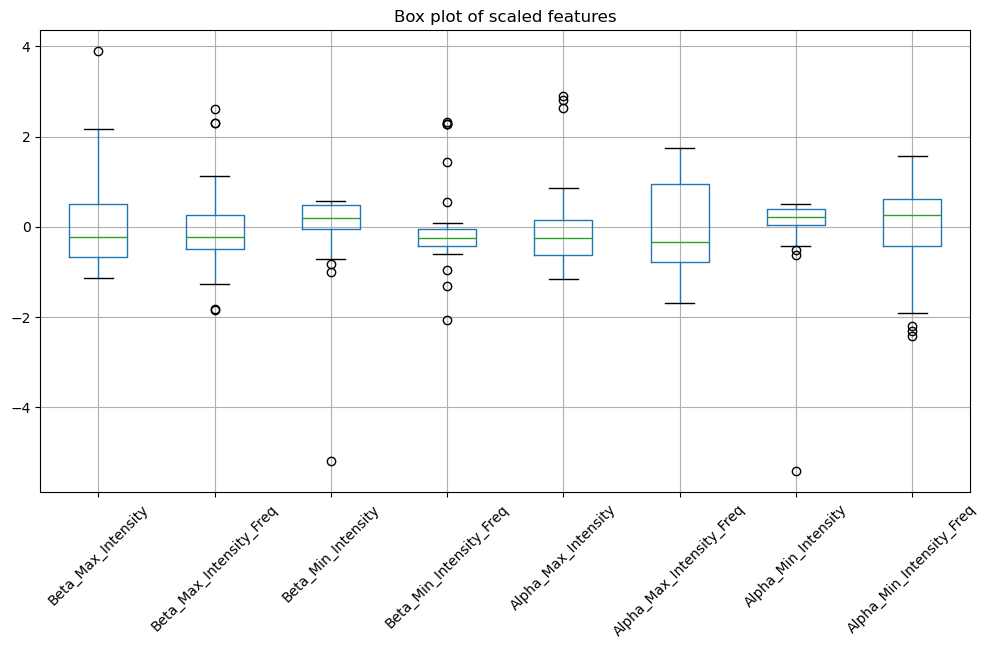

In [348]:
import matplotlib.pyplot as plt

# Select the features to plot, excluding the target features
features_to_plot = ['Beta_Max_Intensity', 'Beta_Max_Intensity_Freq', 'Beta_Min_Intensity', 
                    'Beta_Min_Intensity_Freq', 'Alpha_Max_Intensity', 'Alpha_Max_Intensity_Freq', 
                    'Alpha_Min_Intensity', 'Alpha_Min_Intensity_Freq']

# Creating box plots
plt.figure(figsize=(12, 6))
merged_df[features_to_plot].boxplot()
plt.title('Box plot of scaled features')
plt.xticks(rotation=45)
plt.show()


### Although some outliers were observed, we decided not to remove them due to the small size of the dataset, opting to preserve as much data as possible for the analysis

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining predictors
X = merged_df[['Beta_Max_Intensity', 'Beta_Max_Intensity_Freq', 'Beta_Min_Intensity', 
               'Beta_Min_Intensity_Freq', 'Alpha_Max_Intensity', 'Alpha_Max_Intensity_Freq', 
               'Alpha_Min_Intensity', 'Alpha_Min_Intensity_Freq']]

# Correct way to define multiple targets
y = merged_df[['Total α', 'Total β']]

# Splitting the data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Creatting a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
# For multi-output regression, you might want to evaluate each target separately
mse_alpha = mean_squared_error(y_test['Total α'], y_pred[:, 0])
r2_alpha = r2_score(y_test['Total α'], y_pred[:, 0])

mse_beta = mean_squared_error(y_test['Total β'], y_pred[:, 1])
r2_beta = r2_score(y_test['Total β'], y_pred[:, 1])

print("Mean Squared Error (MSE) for Total α:", mse_alpha)
print("R^2 Score for Total α:", r2_alpha)
print("Mean Squared Error (MSE) for Total β:", mse_beta)
print("R^2 Score for Total β:", r2_beta)


Mean Squared Error (MSE) for Total α: 53.83032356051968
R^2 Score for Total α: 0.5249788665219539
Mean Squared Error (MSE) for Total β: 30.667377829344527
R^2 Score for Total β: 0.8503666403322825


In [354]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Setup cross-validation (e.g., 5-fold cross-validation)
cv = KFold(n_splits=5, random_state=12, shuffle=True)

# Calculate scores using cross-validation
# We'll calculate the R^2 score for model validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Cross-Validated R^2 Scores:", scores)
print("Average R^2 Score:", np.mean(scores))


Cross-Validated R^2 Scores: [ 0.81779455  0.49496482  0.73214296 -1.16659409  0.64185946]
Average R^2 Score: 0.30403354022568657


In [355]:
# This is the same model but here we are doing with two separate models of linear regression
X = merged_df[['Beta_Max_Intensity','Beta_Max_Intensity_Freq', 'Beta_Min_Intensity', 'Beta_Min_Intensity_Freq', 'Alpha_Max_Intensity','Alpha_Max_Intensity_Freq', 'Alpha_Min_Intensity', 'Alpha_Min_Intensity_Freq']]
y_alpha = merged_df['Total α']
y_beta = merged_df['Total β']

# Splitting the data into training and testing sets
X_train_alpha, X_test_alpha, y_train_alpha, y_test_alpha = train_test_split(X, y_alpha, test_size=0.2, random_state=12)
X_train_beta, X_test_beta, y_train_beta, y_test_beta = train_test_split(X, y_beta, test_size=0.2, random_state=12)

# Initialize and train the linear regression model for Total α
model_alpha = LinearRegression()
model_alpha.fit(X_train_alpha, y_train_alpha)

# Make predictions and evaluate the model for Total α
y_pred_alpha = model_alpha.predict(X_test_alpha)
mse_alpha = mean_squared_error(y_test_alpha, y_pred_alpha)
r2_alpha = r2_score(y_test_alpha, y_pred_alpha)

# Initialize and train the linear regression model for Total β
model_beta = LinearRegression()
model_beta.fit(X_train_beta, y_train_beta)

# Make predictions and evaluate the model for Total β
y_pred_beta = model_beta.predict(X_test_beta)
mse_beta = mean_squared_error(y_test_beta, y_pred_beta)
r2_beta = r2_score(y_test_beta, y_pred_beta)

# Display the results
results = pd.DataFrame({
    'Model': ['Total α', 'Total β'],
    'MSE': [mse_alpha, mse_beta],
    'R2 Score': [r2_alpha, r2_beta]
})

print("Linear Regression Model Results:")
print(results)

Linear Regression Model Results:
     Model        MSE  R2 Score
0  Total α  88.614350  0.788675
1  Total β  40.732566  0.846914


In [358]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the linear regression model for each target
model_alpha = LinearRegression()
model_beta = LinearRegression()

# Setup cross-validation 
cv = KFold(n_splits=5, random_state=12, shuffle=True)

# Calculate R^2 scores for 'Total α'
scores_alpha = cross_val_score(model_alpha, X, y_alpha, cv=cv, scoring='r2')
print("Cross-Validated R^2 Scores for Total α:", scores_alpha)
print("Average R^2 Score for Total α:", np.mean(scores_alpha))

# Calculate R^2 scores for 'Total β'
scores_beta = cross_val_score(model_beta, X, y_beta, cv=cv, scoring='r2')
print("Cross-Validated R^2 Scores for Total β:", scores_beta)
print("Average R^2 Score for Total β:", np.mean(scores_beta))


Cross-Validated R^2 Scores for Total α: [0.78867513 0.52580118 0.73787569 0.6592698  0.75329469]
Average R^2 Score for Total α: 0.6929832991463116
Cross-Validated R^2 Scores for Total β: [ 0.84691397  0.46412846  0.72641024 -2.99245799  0.53042423]
Average R^2 Score for Total β: -0.0849162186949386


#### Linear Regression Analysis

Initial Attempt

We started with a normal linear regression analysis, but the results showed a large deviation.

Refining the Model

To address this issue, we changed the random state and re-ran the analysis.

Cross-Validation

We then performed 5-fold cross-validation to evaluate the model's performance.

Separate Models

Additionally, we attempted to use two separate linear regression models, each targeting a different variable (Total α and Total β).

This approach allowed us to compare the performance of the single multi-output model with the separate models.

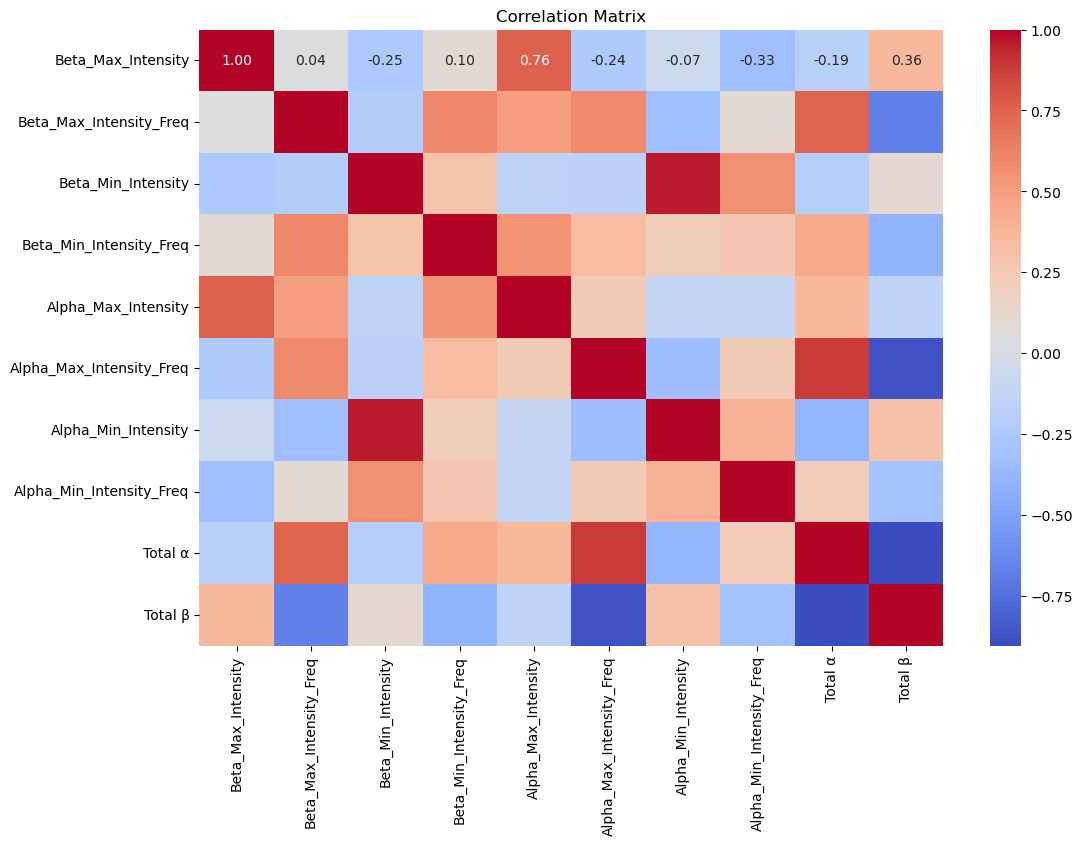

In [360]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the correlation matrix, excluding the 'Protein' column
correlation_matrix = merged_df.drop(columns=['Protein']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### Initially, I considered eight feature variables for training a linear regression model. To better understand the relationships between these variables, I generated a correlation matrix. The matrix reveals a mix of positive and negative correlations, with some variables showing significant correlations, such as a strong positive correlation between Beta_Max_Intensity and Total α. This analysis helps in identifying multicollinearity and refining feature selection for the model.

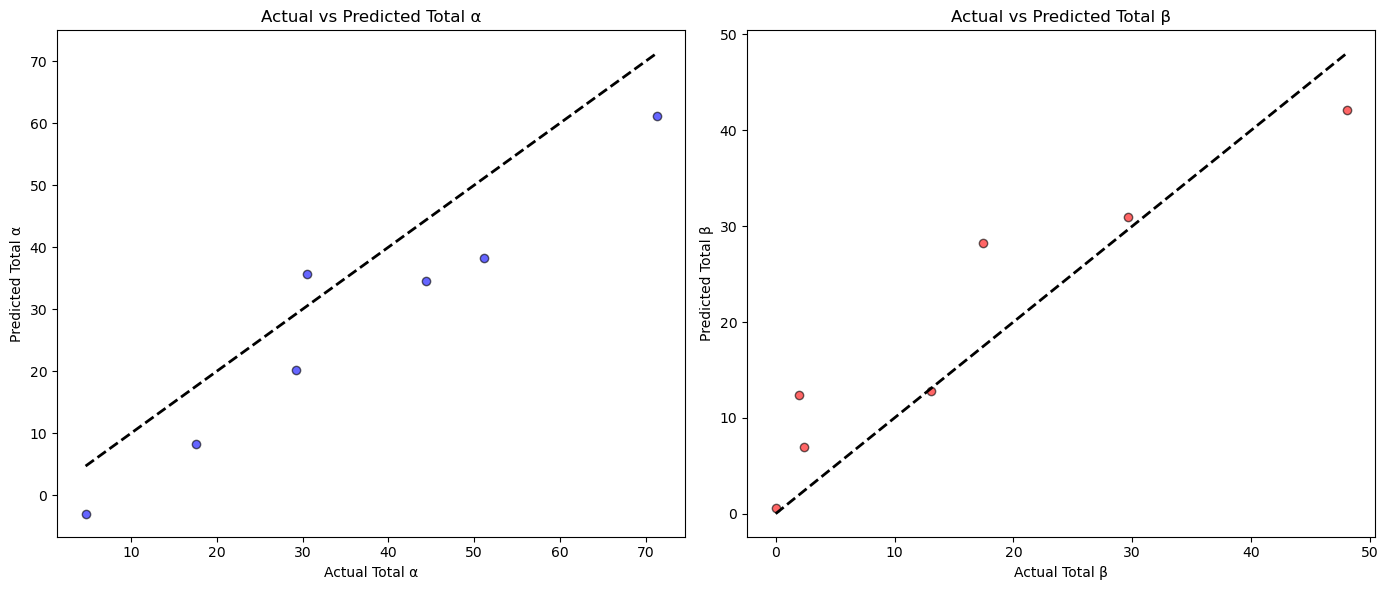

In [362]:
# Plotting the regression results

# Plotting Total α predictions vs actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_alpha, y_pred_alpha, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test_alpha.min(), y_test_alpha.max()], [y_test_alpha.min(), y_test_alpha.max()], 'k--', lw=2)
plt.xlabel('Actual Total α')
plt.ylabel('Predicted Total α')
plt.title('Actual vs Predicted Total α')

# Plotting Total β predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test_beta, y_pred_beta, color='red', edgecolor='k', alpha=0.6)
plt.plot([y_test_beta.min(), y_test_beta.max()], [y_test_beta.min(), y_test_beta.max()], 'k--', lw=2)
plt.xlabel('Actual Total β')
plt.ylabel('Predicted Total β')
plt.title('Actual vs Predicted Total β')

plt.tight_layout()
plt.show()



#### The scatter plots compare the actual versus predicted values for Total α and Total β. The closer the data points are to the diagonal dashed line, the better the model's predictions align with the actual values. While the model shows a reasonably good fit for both Total α and Total β, some deviations indicate areas where the predictions could be improved.

# Bringing all the data 

In [366]:
# importing necessary libraries 

import pandas as pd
import os
import glob
from sklearn.preprocessing import StandardScaler

# path to the main folder containing all protein folders
main_folder_path = '/Users/niyasy/Downloads/Msc Project/Protein library'

# defining the probe frequency range
probe_frequency_range = (1600, 1700)

# defining the pump frequency ranges for alpha and beta values
alpha_pump_range = (1650, 1670)
beta_pump_range = (1630, 1650)

# function to extract alpha and beta values from a spectrum DataFrame
def extract_alpha_beta(spectrum_df, probe_freq_range, alpha_pump_range, beta_pump_range):
    # converting probe frequencies to numerical values (optional)
    spectrum_df.index = spectrum_df.index.astype(float)
    
    # filter probe frequencies
    spectrum_df = spectrum_df[(spectrum_df.index >= probe_freq_range[0]) & (spectrum_df.index <= probe_freq_range[1])]
    
    # ensuring the pump frequencies are numerical values
    spectrum_df.columns = spectrum_df.columns.astype(float)
    
    # extracting the values within the pump frequency ranges
    alpha_values = spectrum_df.loc[:, (spectrum_df.columns >= alpha_pump_range[0]) & (spectrum_df.columns <= alpha_pump_range[1])].values.flatten()
    beta_values = spectrum_df.loc[:, (spectrum_df.columns >= beta_pump_range[0]) & (spectrum_df.columns <= beta_pump_range[1])].values.flatten()
    
    return {
        'alpha_max': alpha_values.max(),
        'alpha_min': alpha_values.min(),
        'beta_max': beta_values.max(),
        'beta_min': beta_values.min()
    }

# Initialize a list to hold all the extracted values and corresponding protein names
extracted_values = []
protein_names_list = []

# Iterate over each protein folder
protein_folders = [f.path for f in os.scandir(main_folder_path) if f.is_dir()]
# Loop through protein folders
for protein_folder in protein_folders:
    protein_name = os.path.basename(protein_folder) # get the name of the protein folder
    
    # Get all CSV files in the current protein folder
    spectrum_files = glob.glob(os.path.join(protein_folder, '*.csv'))
    
    # Read each CSV file and extract the alpha and beta values
    for file in spectrum_files:
        spectrum_df = pd.read_csv(file, index_col=0, delimiter='\t')  # the first column is the probe frequency
        spectrum_df.columns = spectrum_df.columns.astype(float)  # optional
        
        values = extract_alpha_beta(spectrum_df, probe_frequency_range, alpha_pump_range, beta_pump_range)
        values['protein_name'] = protein_name  # Adding the protein name to the values
        extracted_values.append(values)

# Create the DataFrame
extracted_df = pd.DataFrame(extracted_values)

extracted_df

alpha_max  alpha_min  beta_max  beta_min protein_name
0      0.014407  -0.032293  0.014952 -0.035243       Pepsin
1      0.015844  -0.032347  0.016818 -0.036742       Pepsin
2      0.013602  -0.029516  0.014228 -0.032692       Pepsin
3      0.014257  -0.033347  0.015055 -0.036286       Pepsin
4      0.014806  -0.030860  0.015504 -0.034394       Pepsin
...         ...        ...       ...       ...          ...
6332   0.014075  -0.057960  0.012091 -0.030579     Protease
6333   0.019157  -0.065019  0.017065 -0.035025     Protease
6334   0.013584  -0.057109  0.011560 -0.029797     Protease
6335   0.019494  -0.066695  0.017451 -0.036375     Protease
6336   0.019259  -0.071242  0.016088 -0.035970     Protease

[6337 rows x 5 columns]

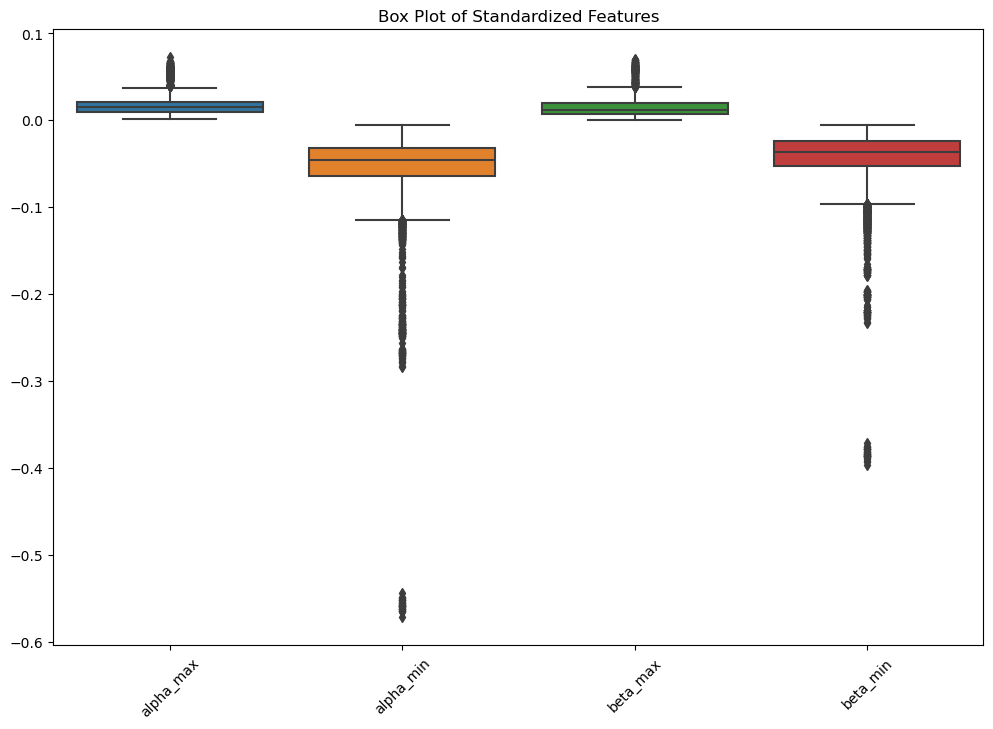

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the standardized columns for visualization
scaled_columns = ['alpha_max', 'alpha_min', 'beta_max', 'beta_min']

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=extracted_df[scaled_columns])
plt.title('Box Plot of Standardized Features')
plt.xticks(rotation=45)
plt.show()

Outliers identified: [2049, 2050, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2063, 2064, 2065, 2067, 2068, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2078, 2079, 2080, 2081, 2082, 2084, 2087, 2088, 2090, 2091, 2093, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2108, 2109, 2110, 2111, 2113, 2114, 2116, 2118, 2120, 2121, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2132, 2135, 2137, 2138, 2140, 2142, 2143, 2146, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2156, 2157, 2159, 2160, 2162, 2166, 2169, 2170, 2171, 2173, 2175, 2177, 2178, 2182, 2184, 2186, 2187, 2188, 2189, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2207, 2209, 2210, 2213, 2214, 2217, 2218, 2221, 2223, 2224, 2227, 2228, 2232, 2233, 2234, 2235, 2236, 2237, 3046, 2239, 2240, 2242, 2243, 2244, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 2

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

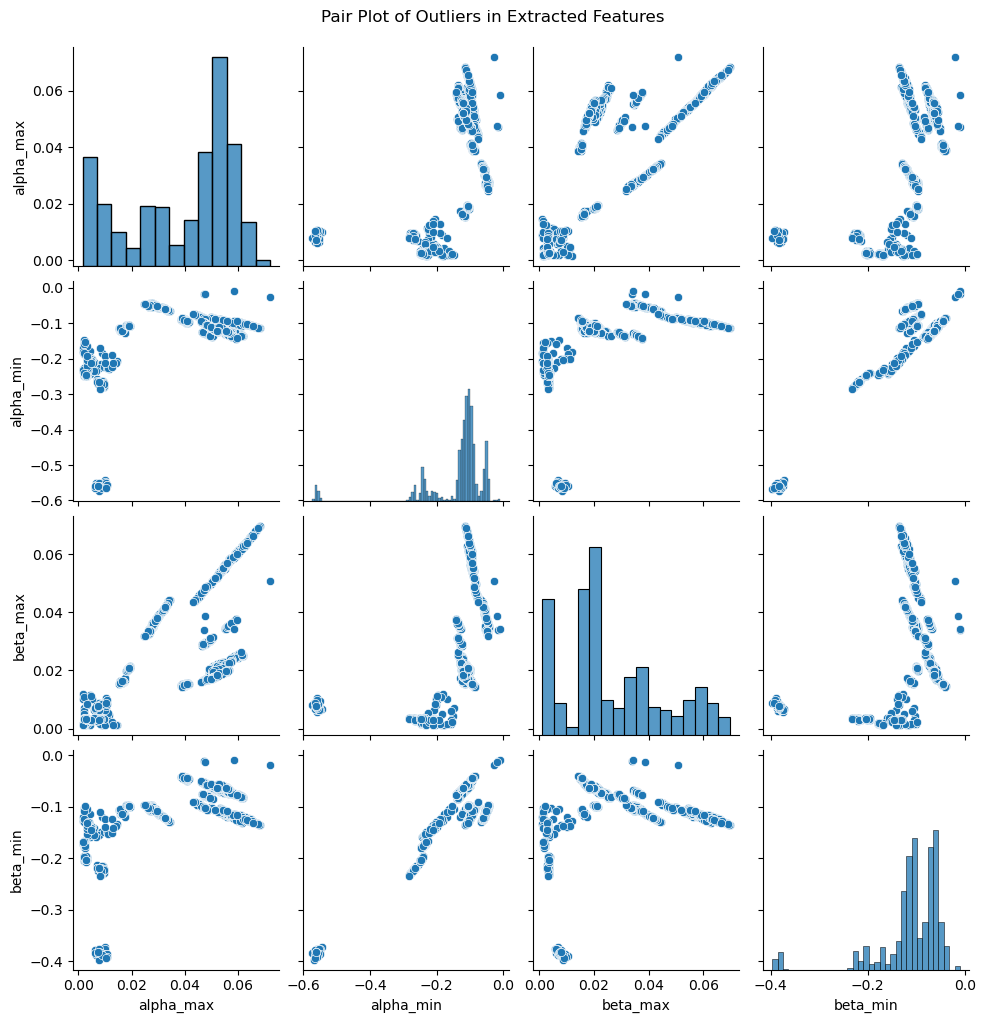

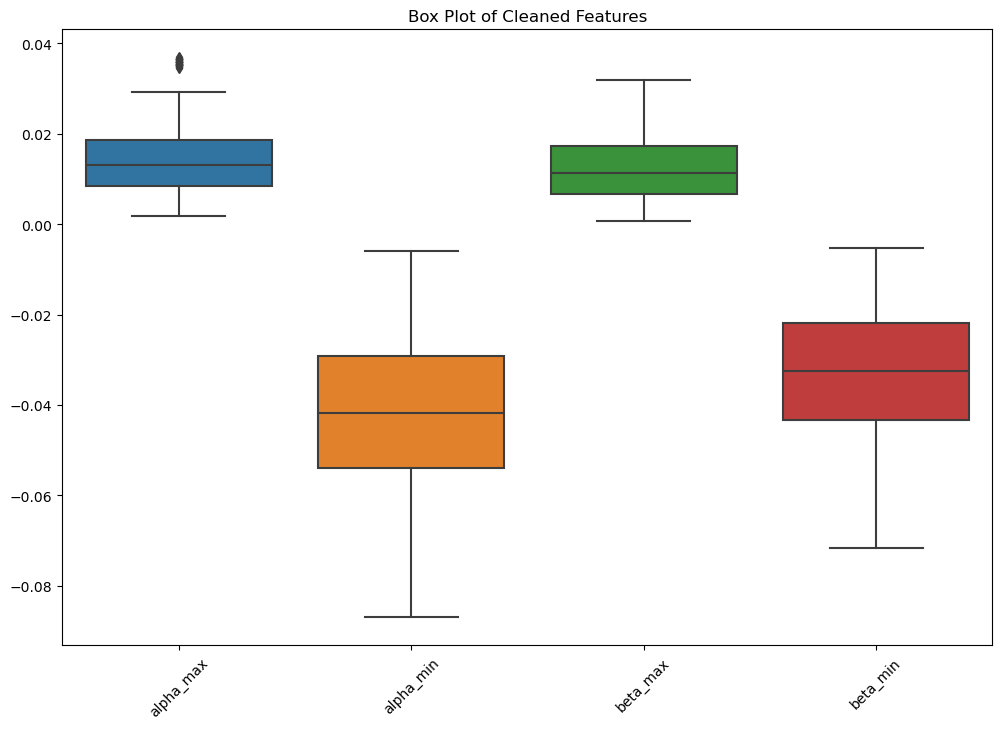

      alpha_max  alpha_min  beta_max  beta_min protein_name
0      0.014407  -0.032293  0.014952 -0.035243       Pepsin
1      0.015844  -0.032347  0.016818 -0.036742       Pepsin
2      0.013602  -0.029516  0.014228 -0.032692       Pepsin
3      0.014257  -0.033347  0.015055 -0.036286       Pepsin
4      0.014806  -0.030860  0.015504 -0.034394       Pepsin
...         ...        ...       ...       ...          ...
5239   0.014075  -0.057960  0.012091 -0.030579     Protease
5240   0.019157  -0.065019  0.017065 -0.035025     Protease
5241   0.013584  -0.057109  0.011560 -0.029797     Protease
5242   0.019494  -0.066695  0.017451 -0.036375     Protease
5243   0.019259  -0.071242  0.016088 -0.035970     Protease

[5244 rows x 5 columns]


In [370]:
# Function to identify outliers using the IQR method
def identify_outliers(df, columns, threshold=1.5):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)
    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    return outlier_indices

# Columns to check for outliers
columns_to_check = ['alpha_max', 'alpha_min', 'beta_max', 'beta_min']

# Identify outliers in the extracted feature variables
outliers = identify_outliers(extracted_df, columns_to_check)
print(f"Outliers identified: {outliers}")

# Visualize the identified outliers
extracted_df_outliers = extracted_df.loc[outliers]
sns.pairplot(extracted_df_outliers[columns_to_check])
plt.suptitle('Pair Plot of Outliers in Extracted Features', y=1.02)
plt.show()

# Function to remove outliers using the IQR method
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers in the extracted feature variables
cleaned_df = remove_outliers(extracted_df, columns_to_check)

# Visualize cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df[columns_to_check])
plt.title('Box Plot of Cleaned Features')
plt.xticks(rotation=45)
plt.show()

cleaned_df.reset_index(drop=True, inplace=True)
print(cleaned_df)


In [371]:
cleaned_df

alpha_max  alpha_min  beta_max  beta_min protein_name
0      0.014407  -0.032293  0.014952 -0.035243       Pepsin
1      0.015844  -0.032347  0.016818 -0.036742       Pepsin
2      0.013602  -0.029516  0.014228 -0.032692       Pepsin
3      0.014257  -0.033347  0.015055 -0.036286       Pepsin
4      0.014806  -0.030860  0.015504 -0.034394       Pepsin
...         ...        ...       ...       ...          ...
5239   0.014075  -0.057960  0.012091 -0.030579     Protease
5240   0.019157  -0.065019  0.017065 -0.035025     Protease
5241   0.013584  -0.057109  0.011560 -0.029797     Protease
5242   0.019494  -0.066695  0.017451 -0.036375     Protease
5243   0.019259  -0.071242  0.016088 -0.035970     Protease

[5244 rows x 5 columns]

In [372]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the cleaned data
scaled_values = scaler.fit_transform(cleaned_df[['alpha_max', 'alpha_min', 'beta_max', 'beta_min']])

# Create a DataFrame with the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled'])

# Add the non-scaled columns back to the scaled DataFrame
scaled_df['protein_name'] = cleaned_df['protein_name']

scaled_df

alpha_max_scaled  alpha_min_scaled  beta_max_scaled  beta_min_scaled  \
0             0.108104          0.688825         0.420661        -0.111641   
1             0.330205          0.685418         0.704278        -0.219328   
2            -0.016328          0.865422         0.310515         0.071557   
3             0.084843          0.621826         0.436344        -0.186548   
4             0.169728          0.779980         0.504495        -0.050661   
...                ...               ...              ...              ...   
5239          0.056696         -0.943210        -0.014229         0.223257   
5240          0.842174         -1.392023         0.741778        -0.096020   
5241         -0.019188         -0.889094        -0.094998         0.279427   
5242          0.894355         -1.498587         0.800401        -0.192970   
5243          0.857941         -1.787756         0.593323        -0.163891   

     protein_name  
0          Pepsin  
1          Pepsin  
2          Pepsin  
3          Pepsin  
4          Pepsin  
...           ...  
5239     Protease  
5240     Protease  
5241     Protease  
5242     Protease  
5243     Protease  

[5244 rows x 5 columns]

In [377]:
training_df

Protein  Total α  Total β
1                      Alpha-2- Macroglobulin (4acq)    12.45    29.97
2                               Alpha-Amylase (1vjs)    23.37    19.86
3                             Apo-Transferrin (4h0w)    29.60    18.11
4                          Beta-Glucunoridase (3lpf)    17.58    29.68
5                          Beta-Lactoglobulin (3npo)     9.88    40.74
6                                         TCI (5j4q)     0.00    27.02
7                                  Calmodulin (1prw)    51.14     2.38
8                                    Catalase (3rgp)    27.25    16.63
9                             Choline oxidase (4mjw)    20.86    20.68
10                    Concanavalin A (Lectin) (1i3h)     0.00    43.36
11                   Creatine (phospho)kinase (1u6r)    35.26    14.21
12                               Cytochrome c (1hrc)    41.35     0.00
13                                   Elastase (1qnj)     5.83    34.17
14  Glyceraldehyde-3- phosphate dehydrogenase (1j0x)    25.30    26.51
15                   Glycogen phosphorylase-b (1axr)    43.27    14.19
16                                        IgG (1hzh)     3.23    43.73
17                          Lactoferrin bovin (1blf)    29.20    17.48
18                          Lactoferrin human (1cb6)    29.67    18.81
19                                     Leptin (1ax8)    56.14     0.00
20                                 Lipoxidase (1f8n)    30.48    13.05
21                                   Lysozyme (4lzt)    31.01     6.20
22                                  Myoglobin (1wla)    71.24     0.00
23                Ovotransferrin (Conalbumin) (1ovt)    26.56    17.56
24                                   Pepsin A (4pep)    11.04    43.56
25                                 Peroxidase (1hch)    44.44     1.96
26                                    RNase A (1kf5)    17.74    33.06
27                                        HSA (1n5u)    68.61     0.00
28                                   Protease (3unx)    29.56    17.88
29             Superoxidase Dismutase (Cu Zn) (1q0e)     2.65    39.07
30                                  Thaumatin (3aok)    10.63    35.75
31                                 Prealbumin (1tta)     4.72    48.03
32                        Trypsin inhibitor A (1ba7)     0.00    34.65
33                                  Ubiquitin (2wwz)    15.79    31.58

In [379]:
print("Protein names in scaled_df:")
print(scaled_df['protein_name'].unique())

print("Protein names in training_df:")
print(training_df['Protein'].unique())


Protein names in scaled_df:
['Pepsin' 'TCI' 'Trypsin inhibitor A' 'Prealbumin' 'Lysozyme'
 'apo transferrin' 'Lactoferrin bovine' 'gly phos b' 'Cytochrome c'
 'Superoxide dismutase' 'Elastase' 'a amylase' 'b glucuronidase'
 'Conalbumin' 'IgG' 'Choline oxidase' 'Peroxidase' 'Catalase'
 'Lactoferrin human' 'Ubiquitin' 'b lactoglobulin' 'Lipoxidase'
 'Calmodulin' 'a 2 macroglobulin' 'Gly 3 phos dehyd' 'Thaumatin' 'HSA'
 'Creatine' 'Protease']
Protein names in training_df:
['Alpha-2- Macroglobulin (4acq)' 'Alpha-Amylase (1vjs)'
 'Apo-Transferrin (4h0w)' 'Beta-Glucunoridase (3lpf)'
 'Beta-Lactoglobulin (3npo)' 'TCI (5j4q)' 'Calmodulin (1prw)'
 'Catalase (3rgp)' 'Choline oxidase (4mjw)'
 'Concanavalin A (Lectin) (1i3h)' 'Creatine (phospho)kinase (1u6r)'
 'Cytochrome c (1hrc)' 'Elastase (1qnj)'
 'Glyceraldehyde-3- phosphate dehydrogenase (1j0x)'
 'Glycogen phosphorylase-b (1axr)' 'IgG (1hzh)' 'Lactoferrin bovin (1blf)'
 'Lactoferrin human (1cb6)' 'Leptin (1ax8)' 'Lipoxidase (1f8n)'
 'Lysozyme

In [399]:
# Apply mapping
scaled_df['Protein'] = scaled_df['protein_name'].map(protein_name_mapping)

# Merge DataFrames
combine_df = pd.merge(scaled_df, training_df, on='Protein', how='inner')

# Drop the 'protein_name' column as it's redundant
combine_df.drop('protein_name', axis=1, inplace=True)

# Reorder columns to bring 'Protein' to the first position
columns = ['Protein'] + [col for col in combine_df.columns if col != 'Protein']
combine_df = combine_df[columns]

# Reset the index
combine_df.reset_index(drop=True, inplace=True)
combine_df.index += 1  # Adjust the index to start from 1 if needed

# Display the combined DataFrame
combine_df


Protein  alpha_max_scaled  alpha_min_scaled  beta_max_scaled  \
1     Pepsin A (4pep)          0.108104          0.688825         0.420661   
2     Pepsin A (4pep)          0.330205          0.685418         0.704278   
3     Pepsin A (4pep)         -0.016328          0.865422         0.310515   
4     Pepsin A (4pep)          0.084843          0.621826         0.436344   
5     Pepsin A (4pep)          0.169728          0.779980         0.504495   
...               ...               ...               ...              ...   
5240  Protease (3unx)          0.056696         -0.943210        -0.014229   
5241  Protease (3unx)          0.842174         -1.392023         0.741778   
5242  Protease (3unx)         -0.019188         -0.889094        -0.094998   
5243  Protease (3unx)          0.894355         -1.498587         0.800401   
5244  Protease (3unx)          0.857941         -1.787756         0.593323   

      beta_min_scaled  Total α  Total β  
1           -0.111641    11.04    43.56  
2           -0.219328    11.04    43.56  
3            0.071557    11.04    43.56  
4           -0.186548    11.04    43.56  
5           -0.050661    11.04    43.56  
...               ...      ...      ...  
5240         0.223257    29.56    17.88  
5241        -0.096020    29.56    17.88  
5242         0.279427    29.56    17.88  
5243        -0.192970    29.56    17.88  
5244        -0.163891    29.56    17.88  

[5244 rows x 7 columns]

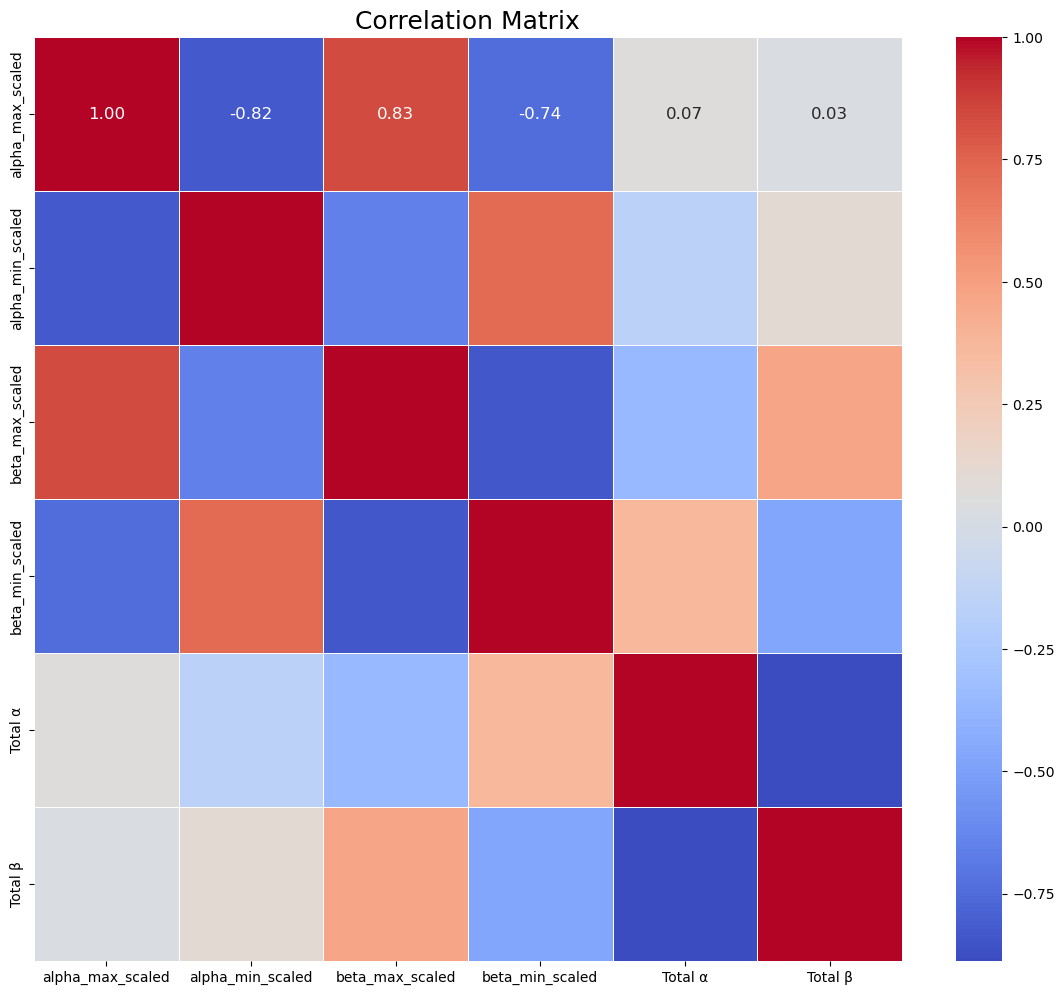

In [520]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric column 'Protein (PDB ID)'
numeric_df = combine_df.drop(columns=['Protein'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 12})

# Set titles and labels
plt.title('Correlation Matrix', size=18)
plt.show()
#Correlation Matrix of Every Data considertaion of four feature variable after Std.Scaling

In [401]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features
X = combine_df[['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']]

# Targets
y = combine_df[['Total α', 'Total β']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R^2 Score for each target
mse_alpha = mean_squared_error(y_test['Total α'], y_pred[:, 0])
r2_alpha = r2_score(y_test['Total α'], y_pred[:, 0])

mse_beta = mean_squared_error(y_test['Total β'], y_pred[:, 1])
r2_beta = r2_score(y_test['Total β'], y_pred[:, 1])

# Print out the model performance
print("Linear Regression Model Results:")
print(f"Mean Squared Error (MSE) for Total α: {mse_alpha:.4f}")
print(f"R^2 Score for Total α: {r2_alpha:.4f}")
print(f"Mean Squared Error (MSE) for Total β: {mse_beta:.4f}")
print(f"R^2 Score for Total β: {r2_beta:.4f}")


Linear Regression Model Results:
Mean Squared Error (MSE) for Total α: 73.5110
R^2 Score for Total α: 0.6432
Mean Squared Error (MSE) for Total β: 33.8607
R^2 Score for Total β: 0.7807


## Lets go with the Gradient boosting, Random Forrest & Decison Tree

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [443]:
# Features and targets
X = combine_df[['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']]
y = combine_df[['Total α', 'Total β']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [445]:
from sklearn.multioutput import MultiOutputRegressor

# Initialize models with MultiOutputRegressor
models = {
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor(random_state=12)),
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(random_state=12)),
    "Decision Tree": MultiOutputRegressor(DecisionTreeRegressor(random_state=12))
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    
    # Evaluate
    mse_alpha = mean_squared_error(y_test['Total α'], y_pred[:, 0])
    r2_alpha = r2_score(y_test['Total α'], y_pred[:, 0])
    mse_beta = mean_squared_error(y_test['Total β'], y_pred[:, 1])
    r2_beta = r2_score(y_test['Total β'], y_pred[:, 1])
    
    # Store results
    results[name] = {
        "MSE Total α": mse_alpha,
        "R2 Total α": r2_alpha,
        "MSE Total β": mse_beta,
        "R2 Total β": r2_beta
    }

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()  # New line for better readability


Results for Gradient Boosting:
MSE Total α: 14.2158
R2 Total α: 0.9310
MSE Total β: 8.2785
R2 Total β: 0.9464

Results for Random Forest:
MSE Total α: 1.3606
R2 Total α: 0.9934
MSE Total β: 1.0498
R2 Total β: 0.9932

Results for Decision Tree:
MSE Total α: 3.6520
R2 Total α: 0.9823
MSE Total β: 2.3154
R2 Total β: 0.9850



In [447]:
# Initialize models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}
for target in ['Total α', 'Total β']:
    results[target] = {}
    for name, model in models.items():
        model.fit(X_train, y_train[target])  # Train model on each target separately
        y_pred = model.predict(X_test)  # Predict
        
        # Evaluate
        mse = mean_squared_error(y_test[target], y_pred)
        r2 = r2_score(y_test[target], y_pred)
        
        # Store results
        results[target][name] = {
            "MSE": mse,
            "R2 Score": r2
        }

# Print results
for target, models_results in results.items():
    print(f"Results for {target}:")
    for model_name, metrics in models_results.items():
        print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R2 Score: {metrics['R2 Score']:.4f}")
    print()  # New line for better readability


Results for Total α:
Gradient Boosting - MSE: 14.1937, R2 Score: 0.9311
Random Forest - MSE: 1.5815, R2 Score: 0.9923
Decision Tree - MSE: 5.1288, R2 Score: 0.9751

Results for Total β:
Gradient Boosting - MSE: 8.2785, R2 Score: 0.9464
Random Forest - MSE: 0.9811, R2 Score: 0.9936
Decision Tree - MSE: 2.5959, R2 Score: 0.9832



In [449]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Define features and target variables
features = ['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']
X = combine_df[features]
y_alpha = combine_df['Total α']
y_beta = combine_df['Total β']

# Split the dataset into training and testing sets
X_train_alpha, X_test_alpha, y_train_alpha, y_test_alpha = train_test_split(X, y_alpha, test_size=0.2, random_state=42)
X_train_beta, X_test_beta, y_train_beta, y_test_beta = train_test_split(X, y_beta, test_size=0.2, random_state=42)

### Kernel Ridge Regression

# Kernel Ridge Regression model
kr_model_alpha = KernelRidge(kernel='rbf', alpha=1.0)
kr_model_beta = KernelRidge(kernel='rbf', alpha=1.0)

# Cross-validation
kr_scores_alpha = cross_val_score(kr_model_alpha, X_train_alpha, y_train_alpha, cv=5, scoring='neg_mean_squared_error')
kr_scores_beta = cross_val_score(kr_model_beta, X_train_beta, y_train_beta, cv=5, scoring='neg_mean_squared_error')

print(f'Kernel Ridge Regression Alpha Mean Squared Error: {-kr_scores_alpha.mean():.4f} ± {kr_scores_alpha.std():.4f}')
print(f'Kernel Ridge Regression Beta Mean Squared Error: {-kr_scores_beta.mean():.4f} ± {kr_scores_beta.std():.4f}')

Kernel Ridge Regression Alpha Mean Squared Error: 15.8332 ± 0.4919
Kernel Ridge Regression Beta Mean Squared Error: 10.5820 ± 0.5168


In [451]:
features = ['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']
target_alpha = 'Total α'
target_beta = 'Total β'

# Define features and target variables
X = combine_df[features]
y_alpha = combine_df[target_alpha]
y_beta = combine_df[target_beta]
# Split the dataset into training and testing sets
X_train_alpha, X_test_alpha, y_train_alpha, y_test_alpha = train_test_split(X, y_alpha, test_size=0.2, random_state=12)
X_train_beta, X_test_beta, y_train_beta, y_test_beta = train_test_split(X, y_beta, test_size=0.2, random_state=12)

X_train_alpha_scaled = X_train_alpha
X_test_alpha_scaled = X_test_alpha
X_train_beta_scaled = X_train_beta
X_test_beta_scaled = X_test_beta


In [453]:
# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# SVM model
svm_model_alpha = SVR()
svm_model_beta = SVR()

# Grid search with cross-validation
grid_search_svm_alpha = GridSearchCV(svm_model_alpha, param_grid_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm_beta = GridSearchCV(svm_model_beta, param_grid_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_svm_alpha.fit(X_train_alpha_scaled, y_train_alpha)
grid_search_svm_beta.fit(X_train_beta_scaled, y_train_beta)

# Best parameters and scores
print(f'Best parameters for SVM Alpha: {grid_search_svm_alpha.best_params_}')
print(f'Best score for SVM Alpha: {-grid_search_svm_alpha.best_score_:.4f}')
print(f'Best parameters for SVM Beta: {grid_search_svm_beta.best_params_}')
print(f'Best score for SVM Beta: {-grid_search_svm_beta.best_score_:.4f}')


Best parameters for SVM Alpha: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score for SVM Alpha: 2.0413
Best parameters for SVM Beta: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score for SVM Beta: 1.6037


In [455]:
# Train and evaluate SVM with best parameters
best_svm_model_alpha = SVR(C=grid_search_svm_alpha.best_params_['C'], 
                           gamma=grid_search_svm_alpha.best_params_['gamma'], 
                           kernel='rbf')
best_svm_model_beta = SVR(C=grid_search_svm_beta.best_params_['C'], 
                          gamma=grid_search_svm_beta.best_params_['gamma'], 
                          kernel='rbf')

# Fit the models
best_svm_model_alpha.fit(X_train_alpha_scaled, y_train_alpha)
best_svm_model_beta.fit(X_train_beta_scaled, y_train_beta)

# Predictions
y_pred_alpha_svm_best = best_svm_model_alpha.predict(X_test_alpha_scaled)
y_pred_beta_svm_best = best_svm_model_beta.predict(X_test_beta_scaled)

from sklearn.metrics import mean_squared_error

# Evaluation
print(f'Best SVM Test MSE for Alpha: {mean_squared_error(y_test_alpha, y_pred_alpha_svm_best):.4f}')
print(f'Best SVM Test MSE for Beta: {mean_squared_error(y_test_beta, y_pred_beta_svm_best):.4f}')


Best SVM Test MSE for Alpha: 1.7577
Best SVM Test MSE for Beta: 1.6163


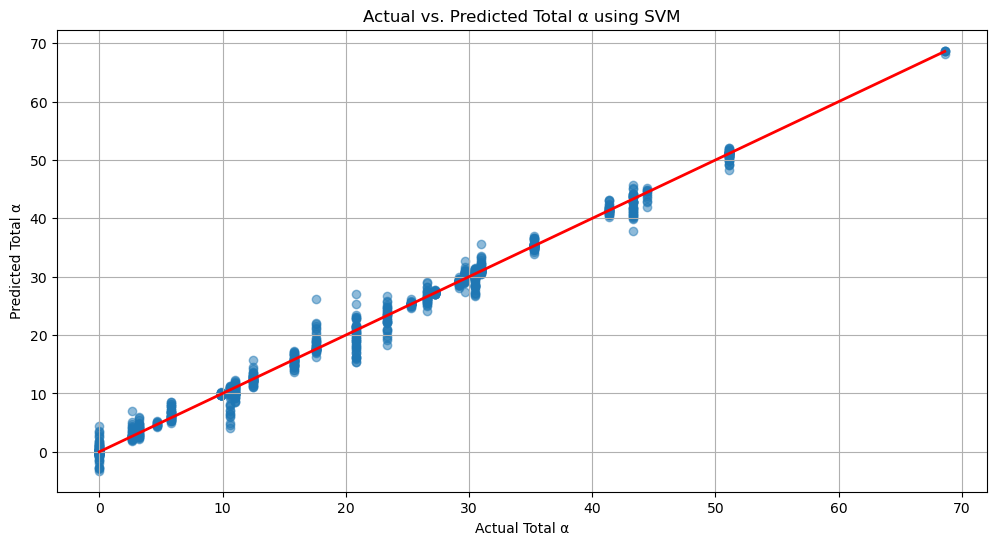

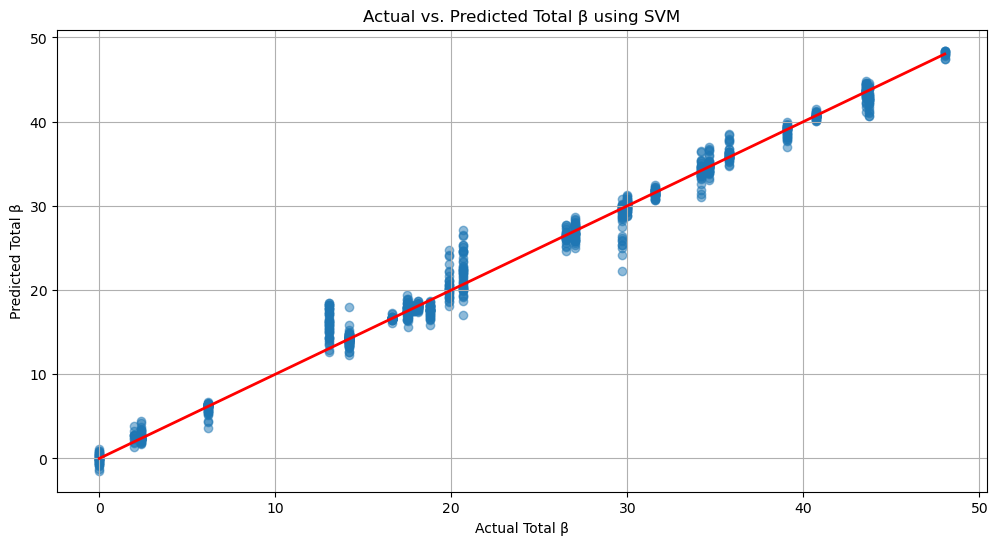

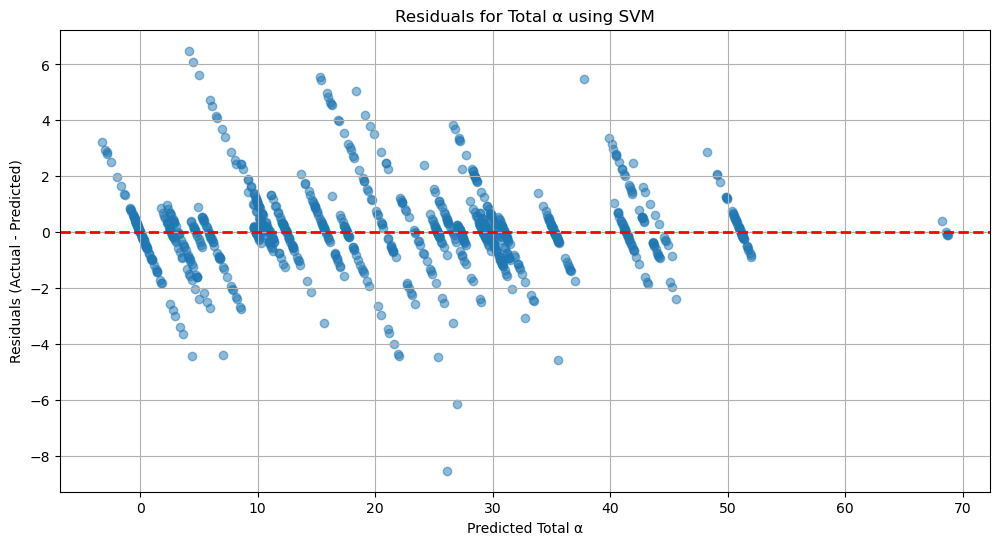

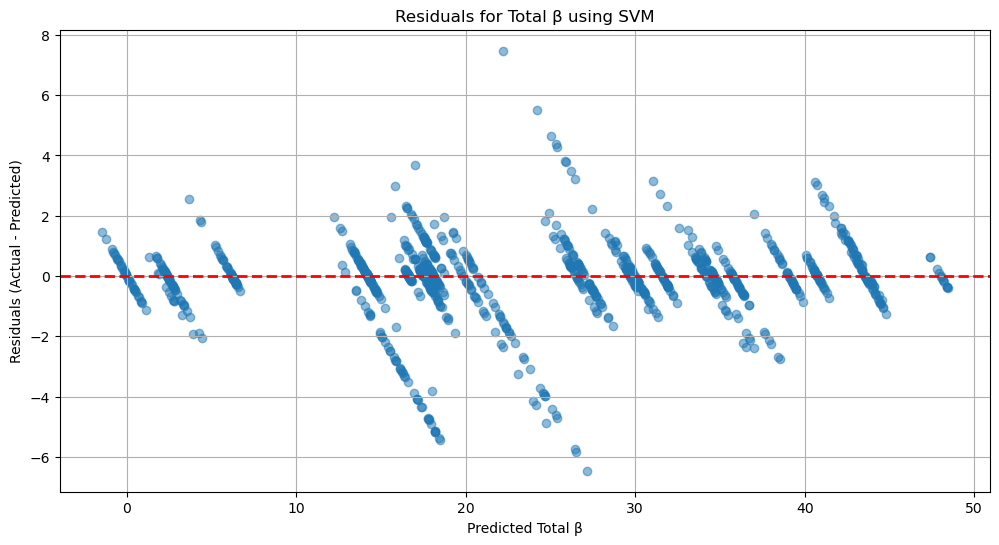

In [457]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Alpha content
plt.figure(figsize=(12, 6))
plt.scatter(y_test_alpha, y_pred_alpha_svm_best, alpha=0.5)
plt.plot([min(y_test_alpha), max(y_test_alpha)], [min(y_test_alpha), max(y_test_alpha)], 'r', lw=2)
plt.xlabel('Actual Total α')
plt.ylabel('Predicted Total α')
plt.title('Actual vs. Predicted Total α using SVM')
plt.grid(True)
plt.show()

# Scatter plot for Beta content
plt.figure(figsize=(12, 6))
plt.scatter(y_test_beta, y_pred_beta_svm_best, alpha=0.5)
plt.plot([min(y_test_beta), max(y_test_beta)], [min(y_test_beta), max(y_test_beta)], 'r', lw=2)
plt.xlabel('Actual Total β')
plt.ylabel('Predicted Total β')
plt.title('Actual vs. Predicted Total β using SVM')
plt.grid(True)
plt.show()

# Residual plot for Alpha content
residuals_alpha = y_test_alpha - y_pred_alpha_svm_best
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_alpha_svm_best, residuals_alpha, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Total α')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals for Total α using SVM')
plt.grid(True)
plt.show()

# Residual plot for Beta content
residuals_beta = y_test_beta - y_pred_beta_svm_best
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_beta_svm_best, residuals_beta, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Total β')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals for Total β using SVM')
plt.grid(True)
plt.show()


In [459]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Expanded parameter grid for hyperparameter tuning
param_grid_svm_expanded = {
    'C': [10, 50, 100, 200],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

# SVM model
svm_model_alpha = SVR()
svm_model_beta = SVR()

# Grid search with cross-validation
grid_search_svm_alpha_expanded = GridSearchCV(svm_model_alpha, param_grid_svm_expanded, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm_beta_expanded = GridSearchCV(svm_model_beta, param_grid_svm_expanded, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search_svm_alpha_expanded.fit(X_train_alpha_scaled, y_train_alpha)
grid_search_svm_beta_expanded.fit(X_train_beta_scaled, y_train_beta)

# Best parameters and scores
print(f'Best parameters for expanded SVM Alpha: {grid_search_svm_alpha_expanded.best_params_}')
print(f'Best score for expanded SVM Alpha: {-grid_search_svm_alpha_expanded.best_score_:.4f}')
print(f'Best parameters for expanded SVM Beta: {grid_search_svm_beta_expanded.best_params_}')
print(f'Best score for expanded SVM Beta: {-grid_search_svm_beta_expanded.best_score_:.4f}')

# Train and evaluate SVM with best parameters
best_svm_model_alpha_expanded = SVR(C=grid_search_svm_alpha_expanded.best_params_['C'], 
                                    gamma=grid_search_svm_alpha_expanded.best_params_['gamma'], 
                                    kernel='rbf')
best_svm_model_beta_expanded = SVR(C=grid_search_svm_beta_expanded.best_params_['C'], 
                                   gamma=grid_search_svm_beta_expanded.best_params_['gamma'], 
                                   kernel='rbf')

# Fit the models
best_svm_model_alpha_expanded.fit(X_train_alpha_scaled, y_train_alpha)
best_svm_model_beta_expanded.fit(X_train_beta_scaled, y_train_beta)

# Predictions
y_pred_alpha_svm_best_expanded = best_svm_model_alpha_expanded.predict(X_test_alpha_scaled)
y_pred_beta_svm_best_expanded = best_svm_model_beta_expanded.predict(X_test_beta_scaled)

# Evaluation
print(f'Best expanded SVM Test MSE for Alpha: {mean_squared_error(y_test_alpha, y_pred_alpha_svm_best_expanded):.4f}')
print(f'Best expanded SVM Test MSE for Beta: {mean_squared_error(y_test_beta, y_pred_beta_svm_best_expanded):.4f}')


Best parameters for expanded SVM Alpha: {'C': 200, 'gamma': 10, 'kernel': 'rbf'}
Best score for expanded SVM Alpha: 0.3874
Best parameters for expanded SVM Beta: {'C': 200, 'gamma': 10, 'kernel': 'rbf'}
Best score for expanded SVM Beta: 0.5885
Best expanded SVM Test MSE for Alpha: 0.2123
Best expanded SVM Test MSE for Beta: 0.3465


In [501]:
# so here we are bringing the validation dataset
import pandas as pd
import glob
import os
from sklearn.preprocessing import StandardScaler

# Path to the new data folder
new_data_folder = '/Users/niyasy/Downloads/Msc Project/Validation set'

# Define the probe frequency range
probe_frequency_range = (1600, 1700)

# Define the pump frequency ranges for alpha and beta values
alpha_pump_range = (1650, 1670)
beta_pump_range = (1630, 1650)

# Function to extract alpha and beta values from a spectrum DataFrame
def extract_alpha_beta(spectrum_df, probe_freq_range, alpha_pump_range, beta_pump_range):
    # Convert probe frequencies to numerical values (if necessary)
    spectrum_df.index = spectrum_df.index.astype(float)
    
    # Filter probe frequencies
    spectrum_df = spectrum_df[(spectrum_df.index >= probe_freq_range[0]) & (spectrum_df.index <= probe_freq_range[1])]
    
    # Ensure the pump frequencies are numerical values
    spectrum_df.columns = spectrum_df.columns.astype(float)
    
    # Extract values within the pump frequency ranges
    alpha_values = spectrum_df.loc[:, (spectrum_df.columns >= alpha_pump_range[0]) & (spectrum_df.columns <= alpha_pump_range[1])].values.flatten()
    beta_values = spectrum_df.loc[:, (spectrum_df.columns >= beta_pump_range[0]) & (spectrum_df.columns <= beta_pump_range[1])].values.flatten()
    
    return {
        'alpha_max': alpha_values.max(),
        'alpha_min': alpha_values.min(),
        'beta_max': beta_values.max(),
        'beta_min': beta_values.min()
    }

# Initialize a list to hold all the extracted values and corresponding protein names
new_extracted_values = []

# Recursively find all CSV files in the new data folder
new_spectrum_files = glob.glob(os.path.join(new_data_folder, '**', '*.csv'), recursive=True)

print(f"Found {len(new_spectrum_files)} files in the directory and its subdirectories.")
print("Files found:")
for file in new_spectrum_files:
    print(file)

# Read each CSV file and extract the alpha and beta values
for file in new_spectrum_files:
    print(f"Reading file: {file}")
    spectrum_df = pd.read_csv(file, index_col=0, delimiter='\t')
    print(spectrum_df.head())
    
    values = extract_alpha_beta(spectrum_df, probe_frequency_range, alpha_pump_range, beta_pump_range)
    
    # Extract protein name from the file path (assuming it is part of the directory structure)
    protein_name = os.path.basename(os.path.dirname(file))
    values['protein_name'] = protein_name  # Add protein name to the values
    
    new_extracted_values.append(values)

# Create the DataFrame for new data
new_extracted_df = pd.DataFrame(new_extracted_values)

# Check the content of the new_extracted_df
print("Extracted DataFrame:")
print(new_extracted_df.head())


Found 594 files in the directory and its subdirectories.
Files found:
/Users/niyasy/Downloads/Msc Project/Validation set/Chymotrypsinogen A/Processed Detector 1 Hanning Applied Chymotrypsinogen A 2 05_02_24 10 sec avg 3 cyc 2DIR Tw=0.255ps, Run 0 Cycle2.csv
/Users/niyasy/Downloads/Msc Project/Validation set/Chymotrypsinogen A/Processed Detector 2 Hanning Applied Chymotrypsinogen A 2 05_02_24 10 sec avg 3 cyc 2DIR Tw=0.3ps, Run 0 Cycle3.csv
/Users/niyasy/Downloads/Msc Project/Validation set/Chymotrypsinogen A/Processed Detector 2 Hanning Applied Chymotrypsinogen A 2 05_02_24 10 sec avg 3 cyc 2DIR Tw=0.255ps, Run 0 Cycle1.csv
/Users/niyasy/Downloads/Msc Project/Validation set/Chymotrypsinogen A/Processed Detector 2 Hanning Applied Chymotrypsinogen A 2 05_02_24 10 sec avg 3 cyc 2DIR Tw=0.3ps, Run 0 Cycle2.csv
/Users/niyasy/Downloads/Msc Project/Validation set/Chymotrypsinogen A/Processed Detector 1 Hanning Applied Chymotrypsinogen A 2 05_02_24 10 sec avg 3 cyc 2DIR Tw=0.255ps, Run 0 Cycle

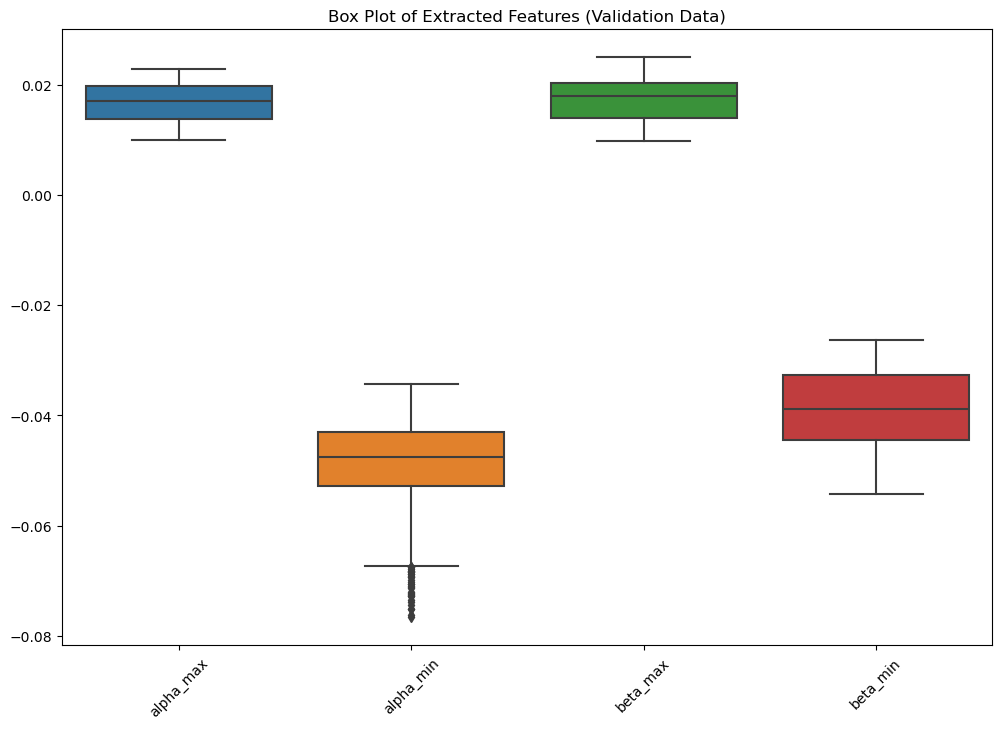

Outliers identified: [513, 514, 516, 519, 522, 525, 401, 403, 405, 411, 414, 419, 429, 430, 442, 444, 577, 585, 588, 468, 469, 477, 478, 490, 491, 496, 499, 500, 501, 505, 506, 510]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

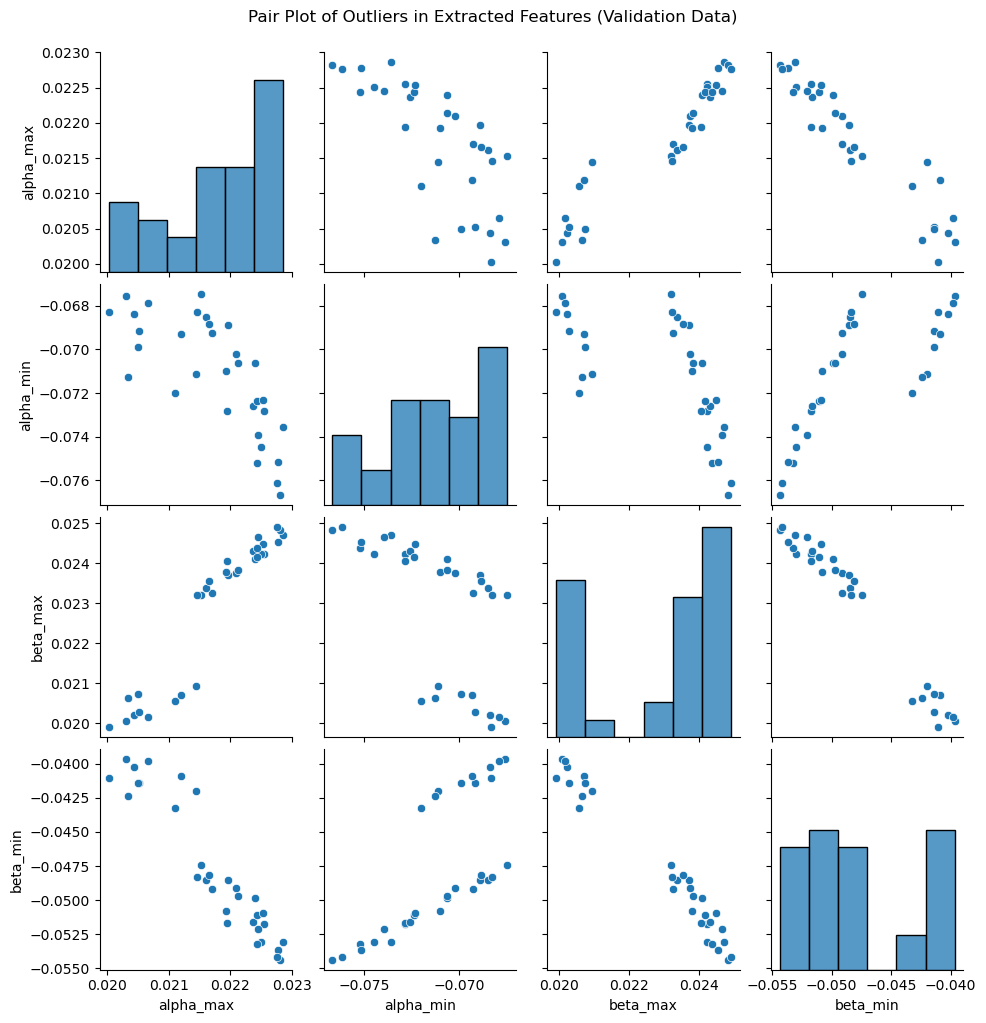

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in the extracted feature variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_extracted_df[['alpha_max', 'alpha_min', 'beta_max', 'beta_min']])
plt.title('Box Plot of Extracted Features (Validation Data)')
plt.xticks(rotation=45)
plt.show()

# Function to identify outliers using the IQR method
def identify_outliers(df, columns, threshold=1.5):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)
    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    return outlier_indices

# Columns to check for outliers
columns_to_check = ['alpha_max', 'alpha_min', 'beta_max', 'beta_min']

# Identify outliers in the extracted feature variables
validation_outliers = identify_outliers(new_extracted_df, columns_to_check)
print(f"Outliers identified: {validation_outliers}")

# Visualize the identified outliers
new_extracted_df_outliers = new_extracted_df.loc[validation_outliers]
sns.pairplot(new_extracted_df_outliers[columns_to_check])
plt.suptitle('Pair Plot of Outliers in Extracted Features (Validation Data)', y=1.02)
plt.show()


In [461]:
# Using the existing scaler that was fitted on the training data
scaled_validation_features = scaler.transform(new_extracted_df[['alpha_max', 'alpha_min', 'beta_max', 'beta_min']])

# Create a DataFrame with the scaled values
scaled_validation_df = pd.DataFrame(scaled_validation_features, columns=['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled'])

# Add the non-scaled columns back to the scaled DataFrame
scaled_validation_df['protein_name'] = new_extracted_df['protein_name']

# Display the scaled validation DataFrame
print("Scaled Validation DataFrame:")
scaled_validation_df

Scaled Validation DataFrame:


alpha_max_scaled  alpha_min_scaled  beta_max_scaled  beta_min_scaled  \
0            0.960931         -0.184411         1.322524        -1.067386   
1            0.945658          0.115395         1.494498        -0.775458   
2            1.119757         -0.284570         1.742440        -1.172863   
3            0.973834          0.135998         1.549897        -0.769043   
4            0.976452         -0.255774         1.353233        -1.095883   
..                ...               ...              ...              ...   
589          0.228929         -0.222611         0.631829         0.027249   
590          0.511478         -0.675252         0.956153        -0.316422   
591          1.230107         -1.473923         1.695656        -0.830095   
592         -0.129487         -0.296699         0.183137         0.207599   
593          0.353722         -0.567640         0.809976        -0.284383   

           protein_name  
0    Chymotrypsinogen A  
1    Chymotrypsinogen A  
2    Chymotrypsinogen A  
3    Chymotrypsinogen A  
4    Chymotrypsinogen A  
..                  ...  
589           Ovalbumin  
590           Ovalbumin  
591           Ovalbumin  
592           Ovalbumin  
593           Ovalbumin  

[594 rows x 5 columns]

In [463]:
# Step 4: Predicting Using the Trained Model
# Predict alpha content
predicted_alpha = best_svm_model_alpha_expanded.predict(scaled_validation_df[['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']])

# Predict beta content
predicted_beta = best_svm_model_beta_expanded.predict(scaled_validation_df[['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']])

# Create a DataFrame to hold the predictions
predictions_df = pd.DataFrame({
    'protein_name': scaled_validation_df['protein_name'],
    'alpha_max_scaled': scaled_validation_df['alpha_max_scaled'],
    'alpha_min_scaled': scaled_validation_df['alpha_min_scaled'],
    'beta_max_scaled': scaled_validation_df['beta_max_scaled'],
    'beta_min_scaled': scaled_validation_df['beta_min_scaled'],
    'predicted_alpha': predicted_alpha,
    'predicted_beta': predicted_beta
})

predictions_df

protein_name  alpha_max_scaled  alpha_min_scaled  beta_max_scaled  \
0    Chymotrypsinogen A          0.960931         -0.184411         1.322524   
1    Chymotrypsinogen A          0.945658          0.115395         1.494498   
2    Chymotrypsinogen A          1.119757         -0.284570         1.742440   
3    Chymotrypsinogen A          0.973834          0.135998         1.549897   
4    Chymotrypsinogen A          0.976452         -0.255774         1.353233   
..                  ...               ...               ...              ...   
589           Ovalbumin          0.228929         -0.222611         0.631829   
590           Ovalbumin          0.511478         -0.675252         0.956153   
591           Ovalbumin          1.230107         -1.473923         1.695656   
592           Ovalbumin         -0.129487         -0.296699         0.183137   
593           Ovalbumin          0.353722         -0.567640         0.809976   

     beta_min_scaled  predicted_alpha  predicted_beta  
0          -1.067386        10.171523       35.787074  
1          -0.775458        18.891079       28.779119  
2          -1.172863        14.842047       33.247170  
3          -0.769043        19.071976       28.673563  
4          -1.095883         9.704469       36.391353  
..               ...              ...             ...  
589         0.027249        23.970301       19.926871  
590        -0.316422        22.314935       23.476443  
591        -0.830095        24.066662       25.627992  
592         0.207599        22.089085       22.053873  
593        -0.284383        20.256216       24.543064  

[594 rows x 7 columns]

In [465]:
import pandas as pd

# Actual values provided
actual_values = {
    'Chymotrypsinogen A (2cga)': {'Total_alpha': 7.35, 'Total_beta': 32.24},
    'DT-diaphorase (1d4a)': {'Total_alpha': 28.94, 'Total_beta': 11.36},
    'Ovalbumin (1ova)': {'Total_alpha': 29.02, 'Total_beta': 31.31}
}

# Compute the mean predicted values for each protein
mean_predictions = predictions_df.groupby('protein_name').mean()[['predicted_alpha', 'predicted_beta']]

# Create a DataFrame to compare predicted and actual values
comparison_df = pd.DataFrame({
    'Protein': list(actual_values.keys()),
    'Predicted Total Alpha': [
        mean_predictions.loc['Chymotrypsinogen A', 'predicted_alpha'],
        mean_predictions.loc['DT diaphorase', 'predicted_alpha'],
        mean_predictions.loc['Ovalbumin', 'predicted_alpha']
    ],
    'Actual Total Alpha': [
        actual_values['Chymotrypsinogen A (2cga)']['Total_alpha'],
        actual_values['DT-diaphorase (1d4a)']['Total_alpha'],
        actual_values['Ovalbumin (1ova)']['Total_alpha']
    ],
    'Predicted Total Beta': [
        mean_predictions.loc['Chymotrypsinogen A', 'predicted_beta'],
        mean_predictions.loc['DT diaphorase', 'predicted_beta'],
        mean_predictions.loc['Ovalbumin', 'predicted_beta']
    ],
    'Actual Total Beta': [
        actual_values['Chymotrypsinogen A (2cga)']['Total_beta'],
        actual_values['DT-diaphorase (1d4a)']['Total_beta'],
        actual_values['Ovalbumin (1ova)']['Total_beta']
    ]
})

# Display the comparison DataFrame
print(comparison_df)


                     Protein  Predicted Total Alpha  Actual Total Alpha  \
0  Chymotrypsinogen A (2cga)              15.555538                7.35   
1       DT-diaphorase (1d4a)              22.243894               28.94   
2           Ovalbumin (1ova)              23.493736               29.02   

   Predicted Total Beta  Actual Total Beta  
0             31.499820              32.24  
1             21.458888              11.36  
2             22.349318              31.31  


In [467]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Actual values provided for the validation dataset
actual_values = {
    'Chymotrypsinogen A (2cga)': {'Total_alpha': 7.35, 'Total_beta': 32.24},
    'DT-diaphorase (1d4a)': {'Total_alpha': 28.94, 'Total_beta': 11.36},
    'Ovalbumin (1ova)': {'Total_alpha': 29.02, 'Total_beta': 31.31}
}

# Compute the mean predicted values for each protein
mean_predictions = predictions_df.groupby('protein_name').mean()[['predicted_alpha', 'predicted_beta']]

# Create lists to store actual and predicted values for each metric calculation
actual_alpha = [
    actual_values['Chymotrypsinogen A (2cga)']['Total_alpha'],
    actual_values['DT-diaphorase (1d4a)']['Total_alpha'],
    actual_values['Ovalbumin (1ova)']['Total_alpha']
]

predicted_alpha = [
    mean_predictions.loc['Chymotrypsinogen A', 'predicted_alpha'],
    mean_predictions.loc['DT diaphorase', 'predicted_alpha'],
    mean_predictions.loc['Ovalbumin', 'predicted_alpha']
]

actual_beta = [
    actual_values['Chymotrypsinogen A (2cga)']['Total_beta'],
    actual_values['DT-diaphorase (1d4a)']['Total_beta'],
    actual_values['Ovalbumin (1ova)']['Total_beta']
]

predicted_beta = [
    mean_predictions.loc['Chymotrypsinogen A', 'predicted_beta'],
    mean_predictions.loc['DT diaphorase', 'predicted_beta'],
    mean_predictions.loc['Ovalbumin', 'predicted_beta']
]

# Calculate metrics for Total Alpha
mae_alpha = mean_absolute_error(actual_alpha, predicted_alpha)
mse_alpha = mean_squared_error(actual_alpha, predicted_alpha)
rmse_alpha = mean_squared_error(actual_alpha, predicted_alpha, squared=False)
r2_alpha = r2_score(actual_alpha, predicted_alpha)

# Calculate metrics for Total Beta
mae_beta = mean_absolute_error(actual_beta, predicted_beta)
mse_beta = mean_squared_error(actual_beta, predicted_beta)
rmse_beta = mean_squared_error(actual_beta, predicted_beta, squared=False)
r2_beta = r2_score(actual_beta, predicted_beta)

# Print the metrics
print(f"Metrics for Total Alpha Predictions:")
print(f"MAE: {mae_alpha}")
print(f"MSE: {mse_alpha}")
print(f"RMSE: {rmse_alpha}")
print(f"R²: {r2_alpha}")

print(f"\nMetrics for Total Beta Predictions:")
print(f"MAE: {mae_beta}")
print(f"MSE: {mse_beta}")
print(f"RMSE: {rmse_beta}")
print(f"R²: {r2_beta}")

# Create a DataFrame to compare predicted and actual values
comparison_df = pd.DataFrame({
    'Protein': list(actual_values.keys()),
    'Predicted Total Alpha': predicted_alpha,
    'Actual Total Alpha': actual_alpha,
    'Predicted Total Beta': predicted_beta,
    'Actual Total Beta': actual_beta
})

# Display the comparison DataFrame
print(comparison_df)


Metrics for Total Alpha Predictions:
MAE: 6.809302705000256
MSE: 47.56942780430838
RMSE: 6.897059359198555
R²: 0.5424664486975794

Metrics for Total Beta Predictions:
MAE: 6.599916752175662
MSE: 60.94307948786915
RMSE: 7.806604863054691
R²: 0.34300400939336984
                     Protein  Predicted Total Alpha  Actual Total Alpha  \
0  Chymotrypsinogen A (2cga)              15.555538                7.35   
1       DT-diaphorase (1d4a)              22.243894               28.94   
2           Ovalbumin (1ova)              23.493736               29.02   

   Predicted Total Beta  Actual Total Beta  
0             31.499820              32.24  
1             21.458888              11.36  
2             22.349318              31.31  


### Neural Network Model


In [479]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Features and Targets
X = combine_df.drop(['Protein', 'Total α', 'Total β'], axis=1)  # Drop non-feature columns
y = combine_df[['Total α', 'Total β']]  # Targets

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Neural Network Model
mlp = MLPRegressor(hidden_layer_sizes=(50,25), max_iter=10000, activation='relu', solver='adam',
                   learning_rate_init=0.0001,  alpha=0.01, random_state=12)

# Train the model
mlp.fit(X_train, y_train)

# Predicting the Test set results
y_pred = mlp.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.4470355743343193


In [413]:
msa = mean_absolute_error(y_test, y_pred)
msa

1.137486251059785

In [415]:
rmse = np.sqrt(mse)
rmse

1.5643003465876748

In [417]:
r2 = r2_score(y_test, y_pred)
r2

0.9859495636070212

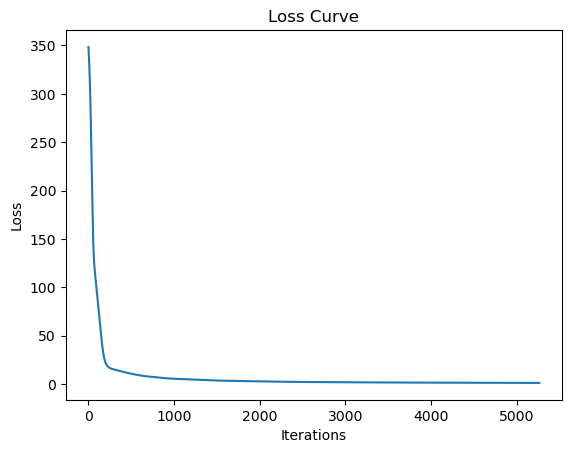

In [222]:
import matplotlib.pyplot as plt

mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [469]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Features and Targets
X = combine_df.drop(['Protein', 'Total α', 'Total β'], axis=1)
y = combine_df[['Total α', 'Total β']]

# Neural Network Model
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=10000, activation='relu',
                   solver='adam', learning_rate_init=0.0001, alpha=0.01, random_state=12)

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=12)  # 5-fold cross-validation

# Define MSE as the scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(mlp, X, y, cv=kf, scoring=mse_scorer)

# Output the MSE scores
print("CV MSE Scores:", -cv_scores)  # Negate the scores because higher is better for cross_val_score
print("Average CV MSE:", -np.mean(cv_scores))


CV MSE Scores: [2.26018346 1.86195761 2.56214521 2.51584068 2.34005413]
Average CV MSE: 2.3080362162284063


In [471]:
# After cross-validation, train the model on the entire training dataset
mlp.fit(X, y)  # This will fit the model on the full dataset after cross-validation atfirst we havent used cv but here we have used it 
# so that we can train our model by with and without cross validation in separately and see the models accuracy

MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 25), learning_rate_init=0.0001,
             max_iter=10000, random_state=12)

In [422]:
y_val = actual_values_df[['Total α',	'Total β']]  # Select the target columns
X_val = scaled_validation_df[['alpha_max_scaled', 'alpha_min_scaled', 'beta_max_scaled', 'beta_min_scaled']]

In [481]:
# Predict the Total α and Total β content using the trained MLP model
validation_predictions = mlp.predict(scaled_validation_features)

# Create a DataFrame for the predictions
validation_predictions_df = pd.DataFrame(validation_predictions, columns=['Predicted Total α', 'Predicted Total β'])

# Add the protein names from the validation dataset to the DataFrame for easier interpretation
validation_predictions_df['protein_name'] = new_extracted_df['protein_name']

# Display the first few rows of the predictions to verify everything is working as expected
print("Validation Predictions:")
validation_predictions_df


Validation Predictions:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Predicted Total α  Predicted Total β        protein_name
0             4.666335          37.599276  Chymotrypsinogen A
1             7.991001          37.788417  Chymotrypsinogen A
2             6.370149          36.641003  Chymotrypsinogen A
3             8.336313          37.752872  Chymotrypsinogen A
4             4.683859          36.880964  Chymotrypsinogen A
..                 ...                ...                 ...
589          24.778600          18.585838           Ovalbumin
590          25.527760          23.799057           Ovalbumin
591          24.774760          27.286446           Ovalbumin
592          25.047559          16.794057           Ovalbumin
593          24.533917          23.833148           Ovalbumin

[594 rows x 3 columns]

In [483]:
import pandas as pd

# Actual values provided
actual_values = {
    'Chymotrypsinogen A': {'Total_alpha': 7.35, 'Total_beta': 32.24},
    'DT-diaphorase': {'Total_alpha': 28.94, 'Total_beta': 11.36},
    'Ovalbumin': {'Total_alpha': 29.02, 'Total_beta': 31.31}
}

# Compute the mean predicted values for each protein
mean_predictions = validation_predictions_df.groupby('protein_name').mean()[['Predicted Total α','Predicted Total β']]

# Create a DataFrame to compare predicted and actual values
comparison_df = pd.DataFrame({
    'Protein': list(actual_values.keys()),
    'Predicted Total Alpha': [
        mean_predictions.loc['Chymotrypsinogen A', 'Predicted Total α'],
        mean_predictions.loc['DT diaphorase', 'Predicted Total α'],
        mean_predictions.loc['Ovalbumin', 'Predicted Total α']
    ],
    'Actual Total Alpha': [
        actual_values['Chymotrypsinogen A']['Total_alpha'],
        actual_values['DT-diaphorase']['Total_alpha'],
        actual_values['Ovalbumin']['Total_alpha']
    ],
    'Predicted Total Beta': [
        mean_predictions.loc['Chymotrypsinogen A', 'Predicted Total β'],
        mean_predictions.loc['DT diaphorase', 'Predicted Total β'],
        mean_predictions.loc['Ovalbumin', 'Predicted Total β']
    ],
    'Actual Total Beta': [
        actual_values['Chymotrypsinogen A']['Total_beta'],
        actual_values['DT-diaphorase']['Total_beta'],
        actual_values['Ovalbumin']['Total_beta']
    ]
})

# Display the comparison DataFrame
print(comparison_df)


              Protein  Predicted Total Alpha  Actual Total Alpha  \
0  Chymotrypsinogen A               7.318755                7.35   
1       DT-diaphorase              24.273602               28.94   
2           Ovalbumin              25.233216               29.02   

   Predicted Total Beta  Actual Total Beta  
0             37.835982              32.24  
1             20.067364              11.36  
2             21.961803              31.31  


In [439]:
# Extracting the actual values into a DataFrame for comparison
actual_values_df = pd.DataFrame({
    'protein_name': list(actual_values.keys()),
    'Total α': [actual_values[key]['Total_alpha'] for key in actual_values.keys()],
    'Total β': [actual_values[key]['Total_beta'] for key in actual_values.keys()]
})

# Display the DataFrame with actual values
print(actual_values_df)

         protein_name  Total α  Total β
0  Chymotrypsinogen A     7.35    32.24
1       DT-diaphorase    28.94    11.36
2           Ovalbumin    29.02    31.31


In [487]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for Total Alpha and Total Beta
mae_alpha = mean_absolute_error(comparison_df['Actual Total Alpha'], comparison_df['Predicted Total Alpha'])
mae_beta = mean_absolute_error(comparison_df['Actual Total Beta'], comparison_df['Predicted Total Beta'])

print(f"Mean Absolute Error for Total Alpha: {mae_alpha}")
print(f"Mean Absolute Error for Total Beta: {mae_beta}")

Mean Absolute Error for Total Alpha: 2.8281424066599583
Mean Absolute Error for Total Beta: 7.8838476794729475


In [485]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted values from the comparison DataFrame
actual_alpha = comparison_df['Actual Total Alpha']
predicted_alpha = comparison_df['Predicted Total Alpha']

actual_beta = comparison_df['Actual Total Beta']
predicted_beta = comparison_df['Predicted Total Beta']

# Calculate MSE
mse_alpha = mean_squared_error(actual_alpha, predicted_alpha)
mse_beta = mean_squared_error(actual_beta, predicted_beta)

# Calculate RMSE
rmse_alpha = np.sqrt(mse_alpha)
rmse_beta = np.sqrt(mse_beta)

# Calculate R²
r2_alpha = r2_score(actual_alpha, predicted_alpha)
r2_beta = r2_score(actual_beta, predicted_beta)

# Display the results
print(f"Mean Squared Error (Alpha): {mse_alpha}")
print(f"Root Mean Squared Error (Alpha): {rmse_alpha}")
print(f"R² (Alpha): {r2_alpha}\n")

print(f"Mean Squared Error (Beta): {mse_beta}")
print(f"Root Mean Squared Error (Beta): {rmse_beta}")
print(f"R² (Beta): {r2_beta}")


Mean Squared Error (Alpha): 12.03866092705939
Root Mean Squared Error (Alpha): 3.4696773520111908
R² (Alpha): 0.8842094273334038

Mean Squared Error (Beta): 64.84066381972151
Root Mean Squared Error (Beta): 8.052370074687422
R² (Beta): 0.30098615764388714
